# <center> **Prediction of Stroke**

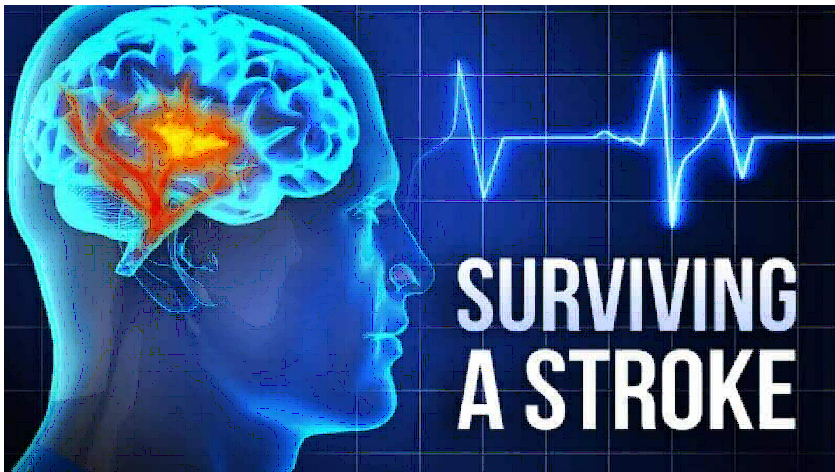

# **Introduction**

A stroke occurs when the blood supply to part of the brain is disrupted or reduced, depriving brain tissue of oxygen and nutrients. This can happen due to a blockage or rupture of a blood vessel. Without prompt medical attention, strokes can cause permanent brain damage or even death. Immediate treatment is crucial to minimize damage and improve outcomes for stroke patients.

It will become evident in this analysis that the data is extremely limited. Predicting a complex disease like a stroke with basic information such as marital status or residence proved to be unproductive. Some of the indicators like, heart disease, hypertention, or average glucose level were more informative. Even smoking did not to be a good predictor. In the final analysis, age was the best indictor for prediction of stroke in this dataset.

# **Dataset**

The "Stroke Prediction Dataset" from Kaggle is a dataset designed to predict whether a patient is likely to have a stroke based on various health and demographic factors. It contains several features including demographic information (age, gender), health parameters (hypertension, heart disease), lifestyle factors (smoking status), and medical history  (glucose and BMI levels). The target variable indicates whether a person has had a stroke or not.

# **Goals**

**Model Testing**: For this project, I picked recall for evaluating my models. I did that after repeated testing of the data with various models. Some of the tests I performed are shown in this project and for the sake of brevity, some are not. In none of my models, was I able to optimze both precision and recall. In the end, I chose recall as the major goal for this project. Recall measures how well a model identifies all actual positive cases (like patients with a disease). It is the percentage of true positive predictions out of all actual positive results. For example, if 100 patients truly have a disease and the model correctly identifies 90 of them, the recall is 90%. High recall means the model is good at detecting the condition. I chaose a 75% recall as the minimum threshold. <BR>

**Hypothesis Testing:** In hypothesis testing section, I started with a null hypothesis (H0) and an alternative hypothesis (H1). The null hypothesis represents a statement of no effect or no difference. The alternative hypothesis represents what we aim to support. The significance level (α) is the probability of rejecting the null hypothesis when it is actually true (Type I Error). My significance level threshold is 0.05, indicating that there is a 5% risk of concluding that a difference exists when there is no actual difference. In my statitical tests, I calculated a p-value, which indicates the probability of obtaining test results at least as extreme as the results observed, assuming that the null hypothesis is true. We then compare the p-value with the significance level, alpha. <BR>
    - p-value ≤ α: Reject the null hypothesis. This suggests that the observed data is sufficiently inconsistent with null hypothesis (H0), and there is evidence to support the alternative hypothesis (H1). <BR>
    - p-value > α: Fail to reject the null hypothesis. This suggests that there is not enough evidence to support H1, and the data is consistent with H0. <RR>

# **Technical Requirements**

1. Perform exploratory data analysis. 
2. Perform statistical inference. 
3. Apply various machine learning models to predict the occurance of stroke. 
4. Provide clear explanations. 
5. Provide suggestions about how the analysis can be improved.

# **Standards**

> **Standard 1:** My standard for an acceptable recall score is 75% or higher .<BR>
> **Standard 2:** My significance level (α) for all hypothesis tests is 0.05. <BR>
> **Standard 3:** My standard for a strong correlation between features is a Pearson correlation coefficient of 0.8 or higher. <BR>    

# **Biases and Data Limitations**

> **Bias 1:** This dataset is highly imbalanced. Out of 5,000 patients, there are only 249 who suffered a stroke. This is a good for the patients, but it makes it difficult to build a good predictive model. <BR>
> **Bias 2:** The data includes information that did not have much predictive value, like marital status, residence or even smoking.

# **Domain Knowledge**

Although I have some scientific knowlege, I have no medical experience. I may have overlooked parts of the data that may have been most important and I may have given importance to parts that may have had little significance. 

# **Deployment with Streamlit**

This project was deployed using Streamlit. 

**Pickle File:** svc_pipeline_Optimized.pkl <BR>
**Streamlit:** Stroke_Streamlit.py

# **Libraries**

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

from feature_engine.imputation import AddMissingIndicator
from feature_engine.imputation import MeanMedianImputer

from feature_engine.encoding import OneHotEncoder

from sklearn.preprocessing import LabelEncoder

from statsmodels.stats.proportion import proportions_ztest
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_classif

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC


from sklearn.metrics import make_scorer, recall_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import VotingClassifier


from sklearn.utils.class_weight import compute_class_weight

from sklearn.feature_selection import SelectKBest, f_classif

from feature_engine.imputation import AddMissingIndicator
from feature_engine.imputation import RandomSampleImputer
from feature_engine.creation import MathFeatures

from sklearn.metrics import accuracy_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate

from sklearn.pipeline import Pipeline

from feature_engine.selection import DropCorrelatedFeatures
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import shap
import optuna
import pickle
import warnings

# **Display Parameters**

## **Display Features**

In [3]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

## **Colors**

In [4]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## **Figure Parameters**

In [5]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data Overview and Preprocessing**

In this chapter, I load the data and present some general information about it. 

In [37]:
data = pd.read_csv(
    r"C:\Users\Dell\Documents\Stroke\Data\stroke.csv",
    index_col=0
)

data = data.drop(columns=['ID'], axis=1)


target = 'Stroke'

In [38]:
data.head()

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work,Residence,AVG Glucose,BMI,Smoking,Stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Number of Rows and Columns**

In [7]:
data.shape

(5109, 12)

## **Dataset Features**

1. **Gender:** Gender of the patient (Male or Female).
2. **Age:** Age of the patient (float).
3. **Hypertension:** 0 for no hypertension diagnosis. 1 for hypertion diagnosis.
4. **Heart Disease:** 0 for no diagnosis for heart disease. 1 for heart disease diagnosis.
5. **Ever Married:** Yes: The patient has been married or is married. No: The patient has never been married.
6. **Work:** Type of work: Private, Self-Employed, Government, Never Worked, Children (The patient is a child)
7. **Residence:** Two values: Rural, Urban
8. **AVG Glucose:** Average glucose level of the patient.
9. **BMI:** Body Mass Index of the patient.
10. **Smoking:**: Does the patient smoke now or before. Values: Unknown, Formerly Smoked, Never Smokes, Smokes.

## **Missing Data**

In [8]:
data.isnull().sum(axis=0)

ID                 0
Gender             0
Age                0
Hypertension       0
Heart Disease      0
Ever Married       0
Work               0
Residence          0
AVG Glucose        0
BMI              201
Smoking            0
Stroke             0
dtype: int64

## **Duplicate Data**

In [9]:
data[data.duplicated(keep=False)].sum()

ID                 0
Gender             0
Age              0.0
Hypertension       0
Heart Disease      0
Ever Married       0
Work               0
Residence          0
AVG Glucose      0.0
BMI              0.0
Smoking            0
Stroke             0
dtype: object

## **Data Types**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             5109 non-null   int64  
 1   Gender         5109 non-null   object 
 2   Age            5109 non-null   float64
 3   Hypertension   5109 non-null   int64  
 4   Heart Disease  5109 non-null   int64  
 5   Ever Married   5109 non-null   object 
 6   Work           5109 non-null   object 
 7   Residence      5109 non-null   object 
 8   AVG Glucose    5109 non-null   float64
 9   BMI            4908 non-null   float64
 10  Smoking        5109 non-null   object 
 11  Stroke         5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


## **Descriptive Information for Numerical Features**

In [11]:
data.drop(columns=['Stroke']).describe(include="number").applymap("{:,.2f}".format)

,ID,Age,Hypertension,Heart Disease,AVG Glucose,BMI
count,"5,109.00","5,109.00","5,109.00","5,109.00","5,109.00","4,908.00"
mean,"36,513.99",43.23,0.10,0.05,106.14,28.89
std,"21,162.01",22.61,0.30,0.23,45.29,7.85
min,67.00,0.08,0.00,0.00,55.12,10.30
25%,"17,740.00",25.00,0.00,0.00,77.24,23.50
50%,"36,922.00",45.00,0.00,0.00,91.88,28.10
75%,"54,643.00",61.00,0.00,0.00,114.09,33.10
max,"72,940.00",82.00,1.00,1.00,271.74,97.60


## **Descriptive Information for Categorical Features**

In [12]:
data.describe(include="object")

,Gender,Ever Married,Work,Residence,Smoking
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


## **Outliers**

An outlier is an observation that is unlike the other observations.

I used the **Interquartile Range (IQR)** method to identify outliers. The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot. I chose to show the outliers numerically instead of graphically. I saw more value in this type of presentation.

In [13]:
numeric_data = data.select_dtypes(include=['number'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

IQR = Q3 - Q1

outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))

outlier_counts = outliers.sum()
print (outlier_counts)


ID                 0
Age                0
Hypertension     498
Heart Disease    276
AVG Glucose      627
BMI              110
Stroke           249
dtype: int64


### **Section Summary**
> * There are over 5,000 records in this dataset.
> * Of the 10 features, 7 are categorical, and 3 are numerical.  
> * The target is the column 'Stroke', with values 0 or 1, where 0 means the patient did not suffer a stroke and 1 means that the patient did.
> * There are 201 null values in the BMI column. The other 9 columns have no null values.
> * Using the IQR method to identify outliers, I identified outliers in every numerical feature, except Age.  

# **Functions**

Below are the functions that I utilized in this project.

## **Side-by-Side Bar Plots**

In [7]:
def side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette):

    '''
    Creates a side-by-side bar plot comparing two datasets.
    '''

    plt.rcParams.update(params)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    sns.barplot(data=data_1, x=feature, y=y, ax=ax1, palette=palette)
    sns.barplot(data=data_2, x=feature, y=y, ax=ax2, palette=palette)

    ax1.set_xlabel(feature)
    ax1.set_ylabel(y)
    ax2.set_xlabel(feature)
    ax2.set_ylabel(y)

    total_count1 = data_1[y].sum()
    for container in ax1.containers:
        labels = [f'{(v.get_height() / total_count1 * 100):.1f}%' for v in container]
        ax1.bar_label(container, labels=labels, size=size)

    total_count2 = data_2[y].sum()
    for container in ax2.containers:
        labels = [f'{(v.get_height() / total_count2 * 100):.1f}%' for v in container]
        ax2.bar_label(container, labels=labels, size=size)

    ax1.set_title(title_1)
    ax2.set_title(title_2)

    sns.despine()

    plt.show()

## **Distributions**

In [8]:
def create_distributions(data, feature, target, value):

    '''
    Creates a distribution of counts for a specific feature within a subset of data.
    '''
    
    df = data[data[target] == value]
    distribution= df.groupby(feature).size().reset_index()
    distribution.columns = [feature, 'Count']

    return distribution

## **Create Bins**

In [9]:
def create_bins(df, feature, new_feature, bins, labels):

    '''
    Creates bins for continuous features.
    '''

    df[new_feature] = pd.cut(df[feature], bins=bins, labels=labels, right=False)

    return df

## **Count Bins**

In [10]:
def count_bins(df, new_feature):

    '''
    Counts the number of observations in each bin.
    '''
    
    group_counts = df[new_feature].value_counts().sort_index()
    group_counts_df = group_counts.reset_index()
    group_counts_df.columns = [new_feature, 'Count']

    return group_counts_df


## **Heat Map**

In [11]:
def create_heatmap(data, title):

    '''
    Creates a Seaborn heatmap.
    '''

    plt.rcParams.update(params)
    corr = data.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))

    f, ax = plt.subplots(figsize=(25, 25))

    cmap = sns.diverging_palette(230, 10, as_cmap=True)
    heatmap = sns.heatmap(
        corr,
        mask=mask,
        vmax=1,
        vmin=-1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
        cmap=plt.cm.Reds,
    )

    heatmap.set_title(
        title,
        fontdict={"fontsize": size},
        pad=12,
    )
    plt.xlabel("")
    plt.ylabel("")

## **Mutual Information**

In [12]:
def create_plot_mi_scores(features, mi_scores):
    
    '''
    Creates a plot of mutual information scores.
    '''

    plt.rcParams.update({'figure.autolayout': True}) 

    scores = pd.Series(mi_scores, name="MI Scores", index=features.columns)
    scores = scores.sort_values(ascending=False)

    plt.figure(figsize=(15, 6))
    scores.plot(kind="line", marker='o')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.title("Mutual Information Scores")
    plt.xlabel("Feature")
    plt.ylabel("MI Score")

    plt.xticks(ticks=range(len(scores)), labels=scores.index, rotation=45, ha='right')

    plt.tight_layout()

    plt.show()

## **Two-Sample T-Test**

In [13]:
def two_sample_t_test(sample1, sample2, variance):
    
    """
    Determines if the means of two samples are significanlty different.
    """
    
    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    p_value = result.pvalue
    
    p_value = "{:.20f}".format(p_value)
    print("The p-value is: ", p_value)

    
    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

### **Section Summary**
> * For this project, I utilized 7 functions.
> * The Docstring for each function explains what each does.

# **Exploratory Data Analysis**

In this chapter, I provide visualizations to summarize the information contained in this dataset.

## **Gender**

In this section, I show the distribution of genders among patients who suffered a stroke and those who did not.

In [20]:
feature = 'Gender'
target = 'Stroke'
data = data.copy()  

In [21]:
wi_stroke_gender = create_distributions(data, feature, target, value = 1)

In [22]:
no_stroke_gender = create_distributions(data, feature, target, value = 0)

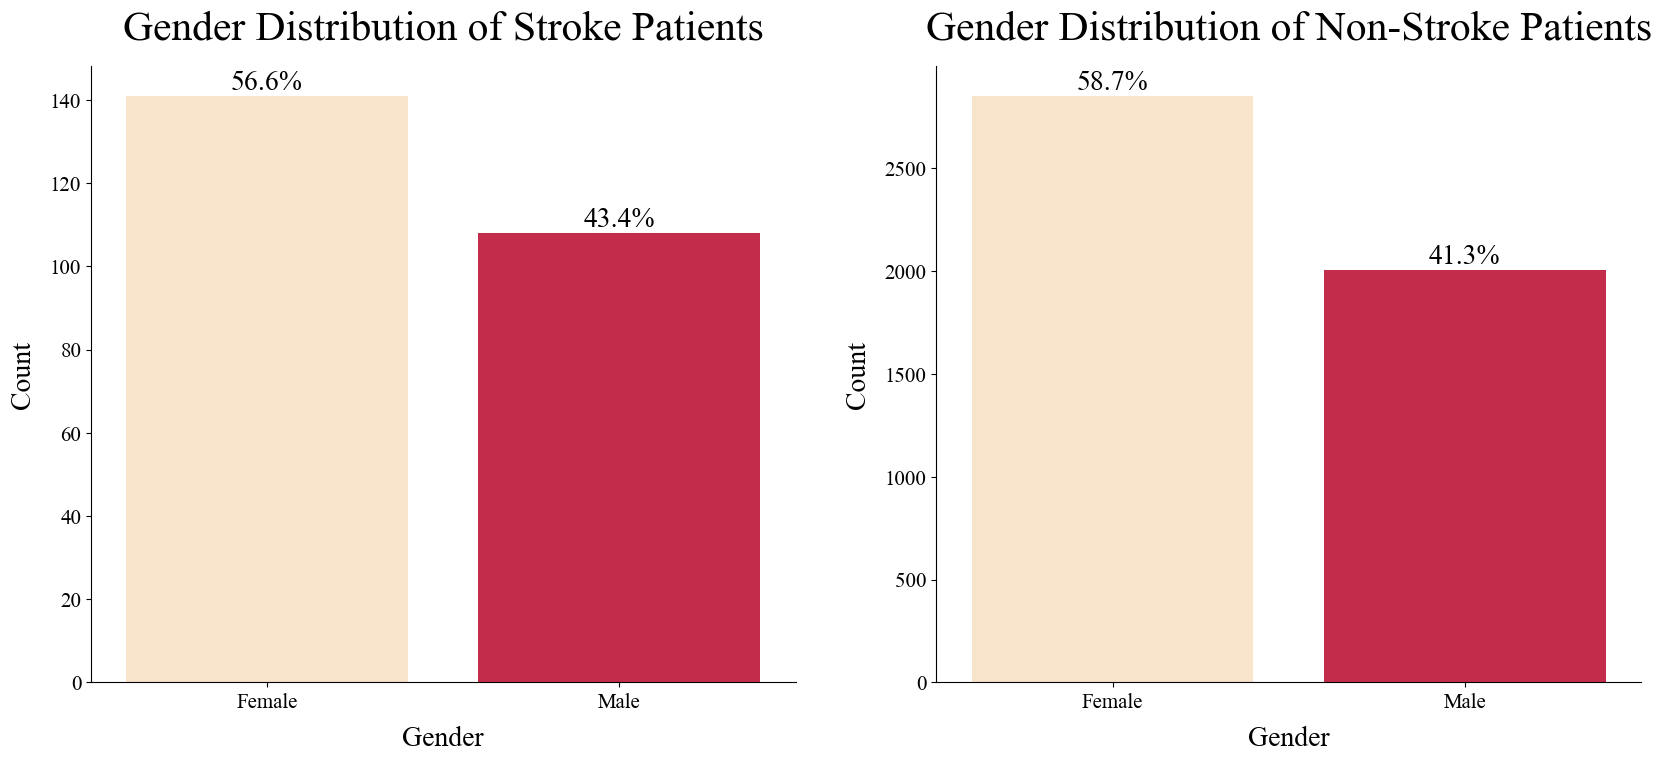

In [23]:
labels = ['Male', 'Female']
palette = [color_1, color_2]
y = 'Count'

data_1 = wi_stroke_gender
data_2 = no_stroke_gender
title_1 = 'Gender Distribution of Stroke Patients'
title_2 = 'Gender Distribution of Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette);

### **Section Summary**
> * Gender distribution is almost the same in patients who suffered a stroke and those who did not. 
> * This data may suggest that the medical establishment should look at both genders equally when assessing people in regards to risk of stroke.

## **Hypertension**

In [24]:
feature = 'Hypertension'
target = 'Stroke'
data = data.copy()

In [25]:
wi_stroke_hypertension = create_distributions(data, feature, target, value = 1)

In [26]:
no_stroke_hypertension = create_distributions(data, feature, target, value = 0)

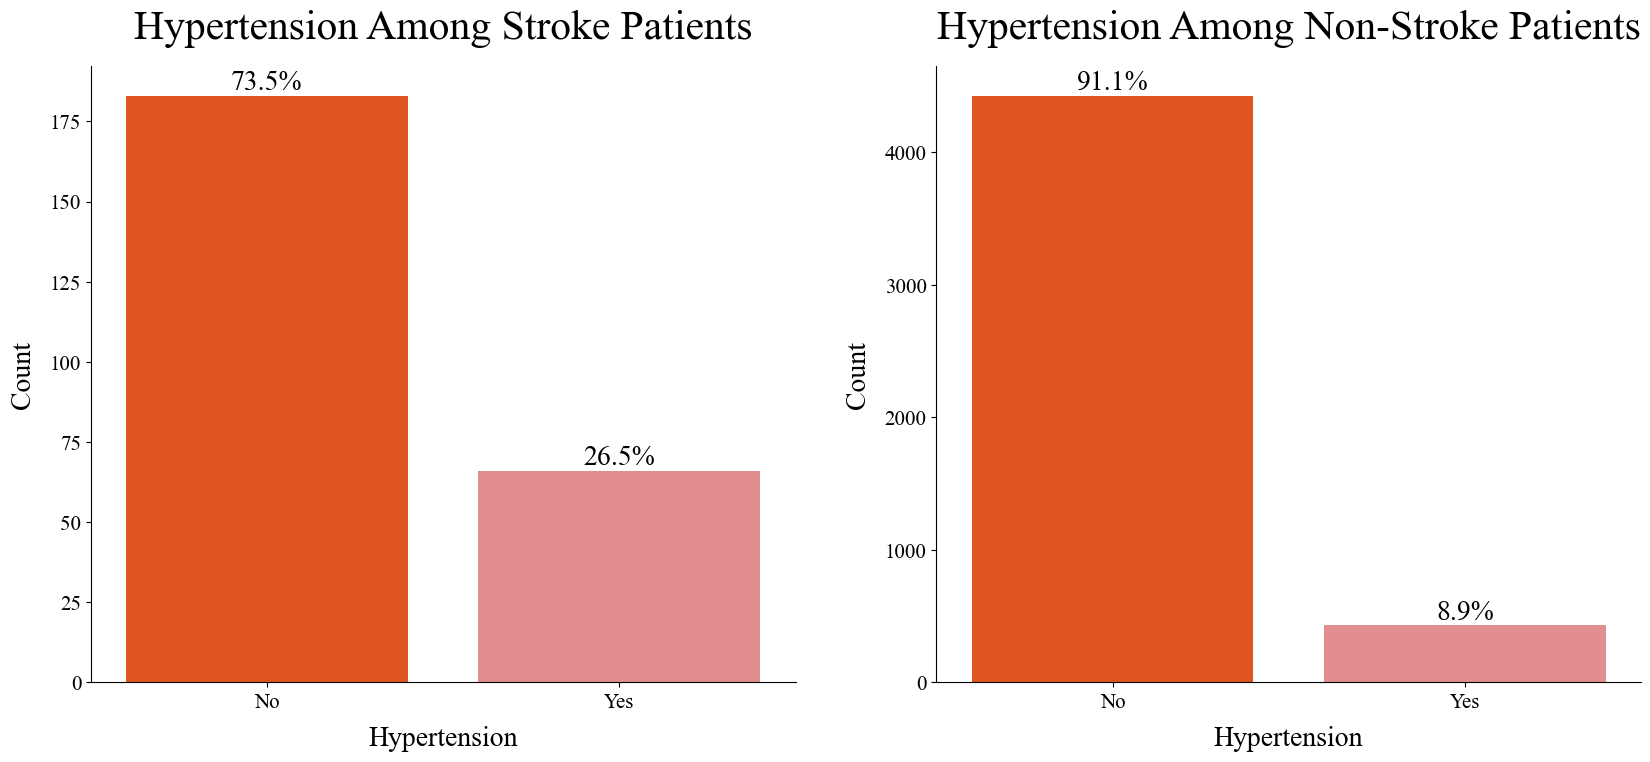

In [27]:
labels = [0, 1]
palette = [color_3, color_4]
y = 'Count'

data_1 = wi_stroke_hypertension.copy() 
data_2 = no_stroke_hypertension.copy()
data_1 ['Hypertension'] = data_1['Hypertension'].replace({0: 'No', 1: 'Yes'})
data_2 ['Hypertension'] = data_2['Hypertension'].replace({0: 'No', 1: 'Yes'})
title_1 = 'Hypertension Among Stroke Patients'
title_2 = 'Hypertension Among Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette);

### **Section Summary**
> * The percentage of patients with hypertension who also suffered a stroke is more than twice that of patients who did not.  
> * Hypertension may be a possible risk factor for stroke. 

## **Heart Disease**

In [28]:
feature = 'Heart Disease'
target = 'Stroke'
data = data.copy()

In [29]:
wi_stroke_heart = create_distributions(data, feature, target, value = 1)

In [30]:
no_stroke_heart = create_distributions(data, feature, target, value = 0)

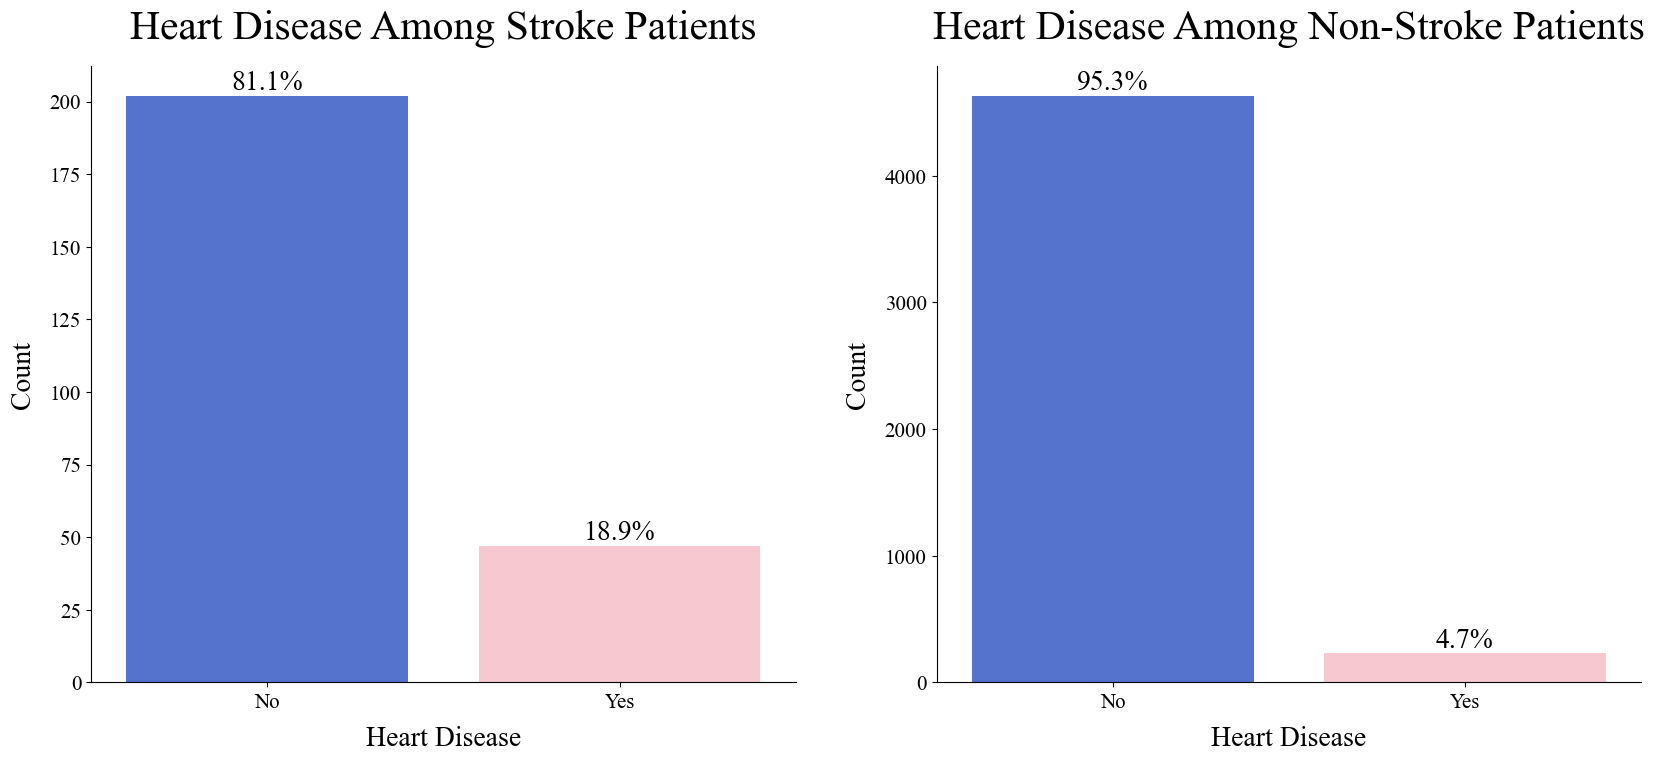

In [31]:
labels = [0, 1]
palette = [color_5, color_6]
y = 'Count'

data_1 = wi_stroke_heart
data_2 = no_stroke_heart 

data_1 ['Heart Disease'] = data_1['Heart Disease'].replace({0: 'No', 1: 'Yes'})
data_2 ['Heart Disease'] = data_2['Heart Disease'].replace({0: 'No', 1: 'Yes'})
title_1 = 'Heart Disease Among Stroke Patients'
title_2 = 'Heart Disease Among Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette)

### **Section Summary**
> * The percentage of patients with heart disease who also suffered a stroke is more than three times of this number for patients who did not.  
> * Hheart disease may be considered as yet another risk factor for stroke. 

## **Marital Status**

In [32]:
feature = 'Ever Married'
target = 'Stroke'
data = data.copy()

In [33]:
wi_stroke_marriage = create_distributions(data, feature, target, value = 1)

In [34]:
no_stroke_marriage = create_distributions(data, feature, target, value = 0)

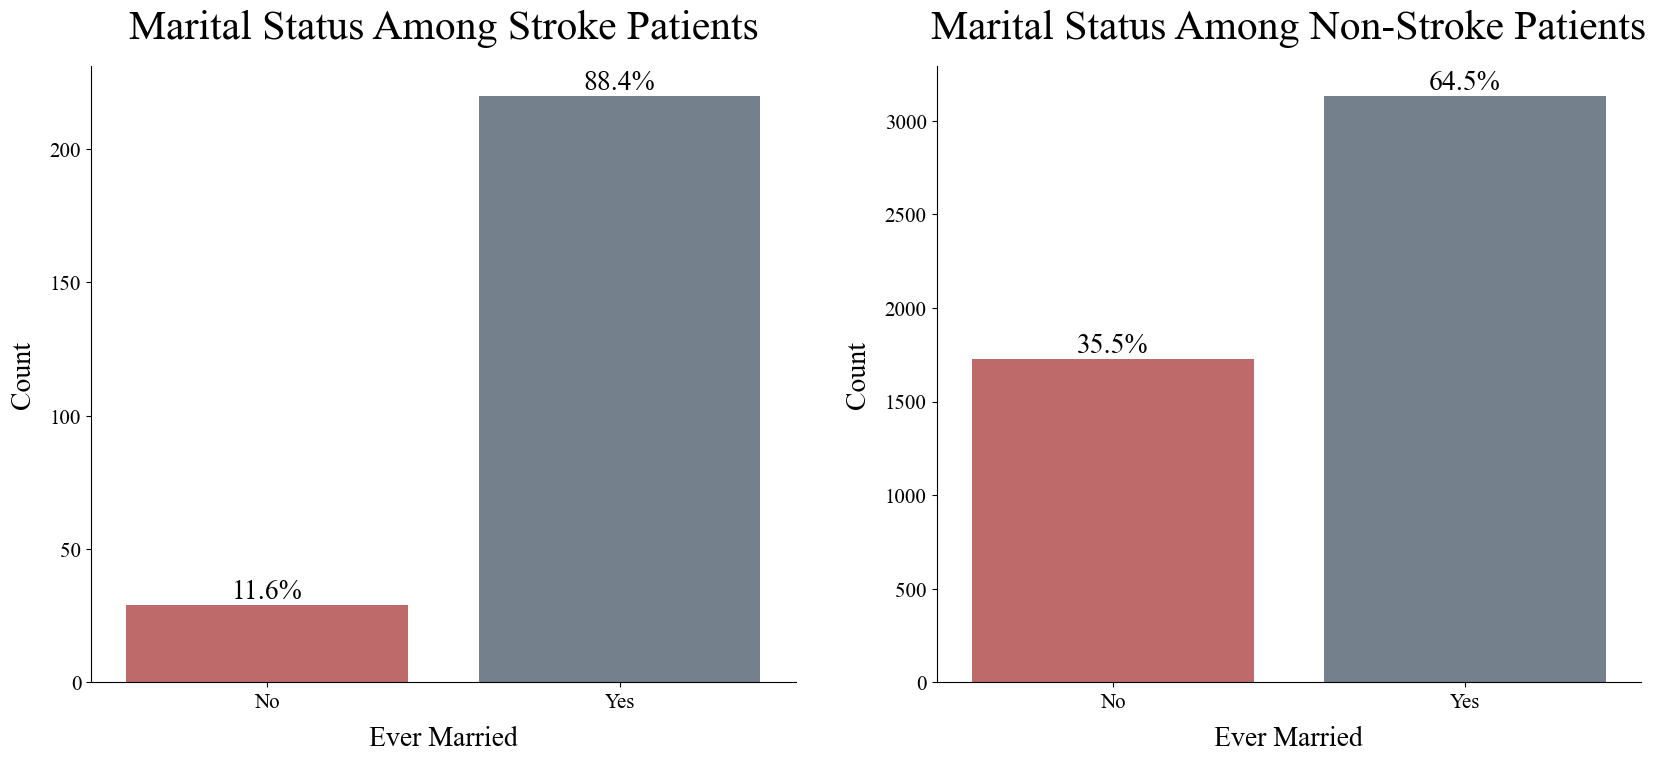

In [35]:
labels = ['No', 'Yes']
palette = [color_7, color_8]
y = 'Count'

data_1 = wi_stroke_marriage
data_2 = no_stroke_marriage
title_1 = 'Marital Status Among Stroke Patients'
title_2 = 'Marital Status Among Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette)

### **Section Summary**
> * It is an accepted idea that our psychological and social states can affect our biology and our susecptibility to illness.   
> * Why is there nearly 3 times as many non-married people among patients who did not suffer a stroke? Is this a conicidence or a real indicator?
> * There is not enough data to make a clear conclusion, but it gives us some reasons to look at the marital status of patients and the quality of such a relationship when it comes to identifying risk factors for stroke.

## **Work Status**

In [36]:
feature = 'Work'
target = 'Stroke'
data = data.copy()

In [37]:
wi_stroke_work = create_distributions(data, feature, target, value = 1)

In [38]:
no_stroke_work = create_distributions(data, feature, target, value = 0)

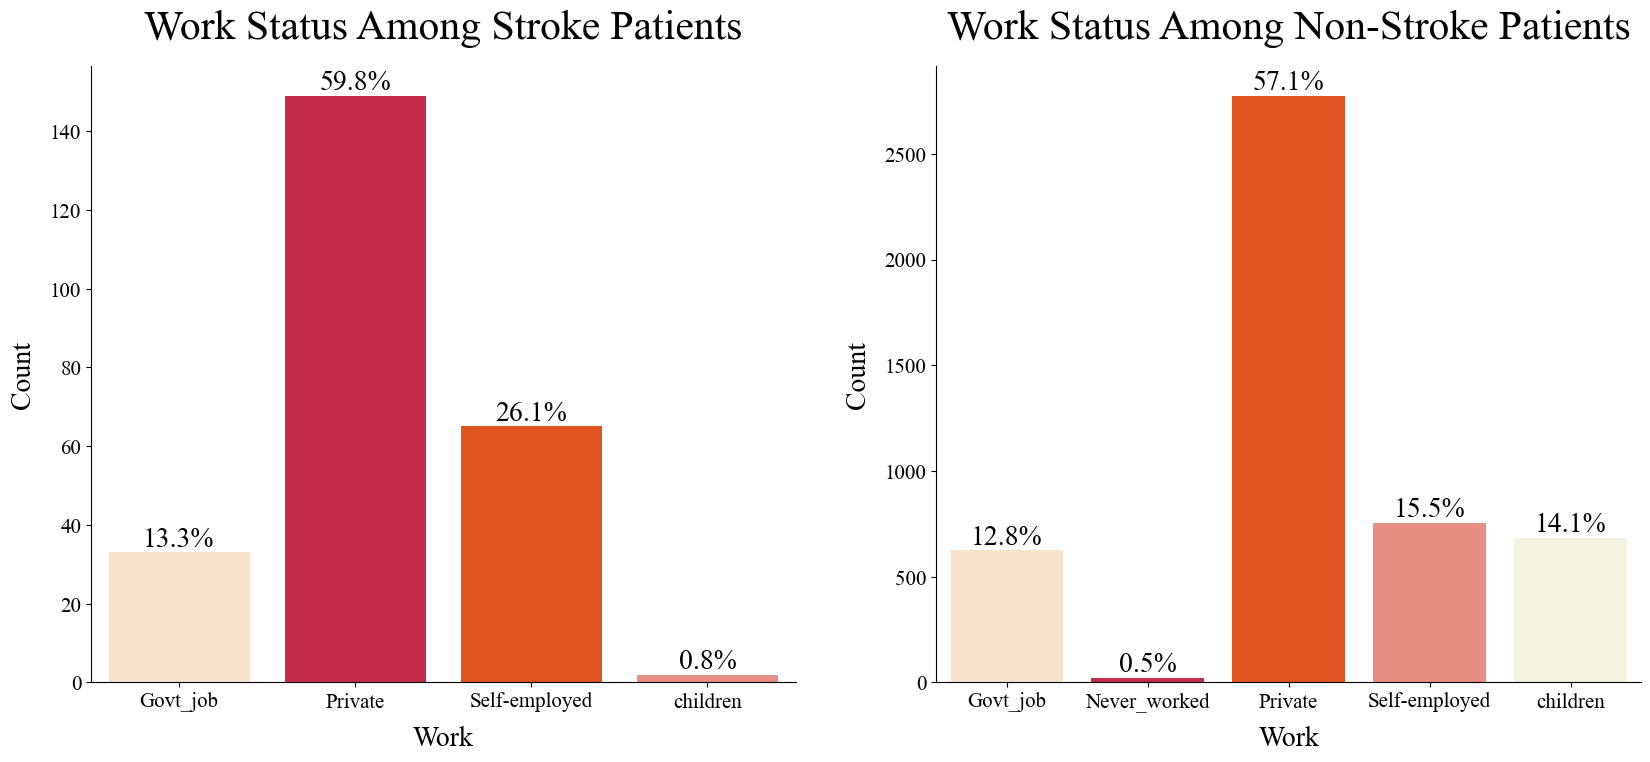

In [39]:
labels = ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
palette = [color_1, color_2, color_3, color_9, color_10]
y = 'Count'

data_1 = wi_stroke_work
data_2 = no_stroke_work
title_1 = 'Work Status Among Stroke Patients'
title_2 = 'Work Status Among Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette)

### **Section Summary**
> * The 'children" category are those who are too young to work. Yet, there is a very small percentage of those in this category who suffered a stroke. An anomoly? Perhpas. The data is not sufficient enough to give us further information. 
> * There is not a significant difference in the other 5 categories. Among the patients who suffered a stroke there is 0% in the "Never_worked" category and 0.5% of the non-stroke patients are in this category. This does not seem to be a significant difference.

## **Residence Type**

In [40]:
feature = 'Residence'
target = 'Stroke'
data = data.copy()

In [41]:
wi_stroke_residence = create_distributions(data, feature, target, value = 1)

In [42]:
no_stroke_residence = create_distributions(data, feature, target, value = 0)

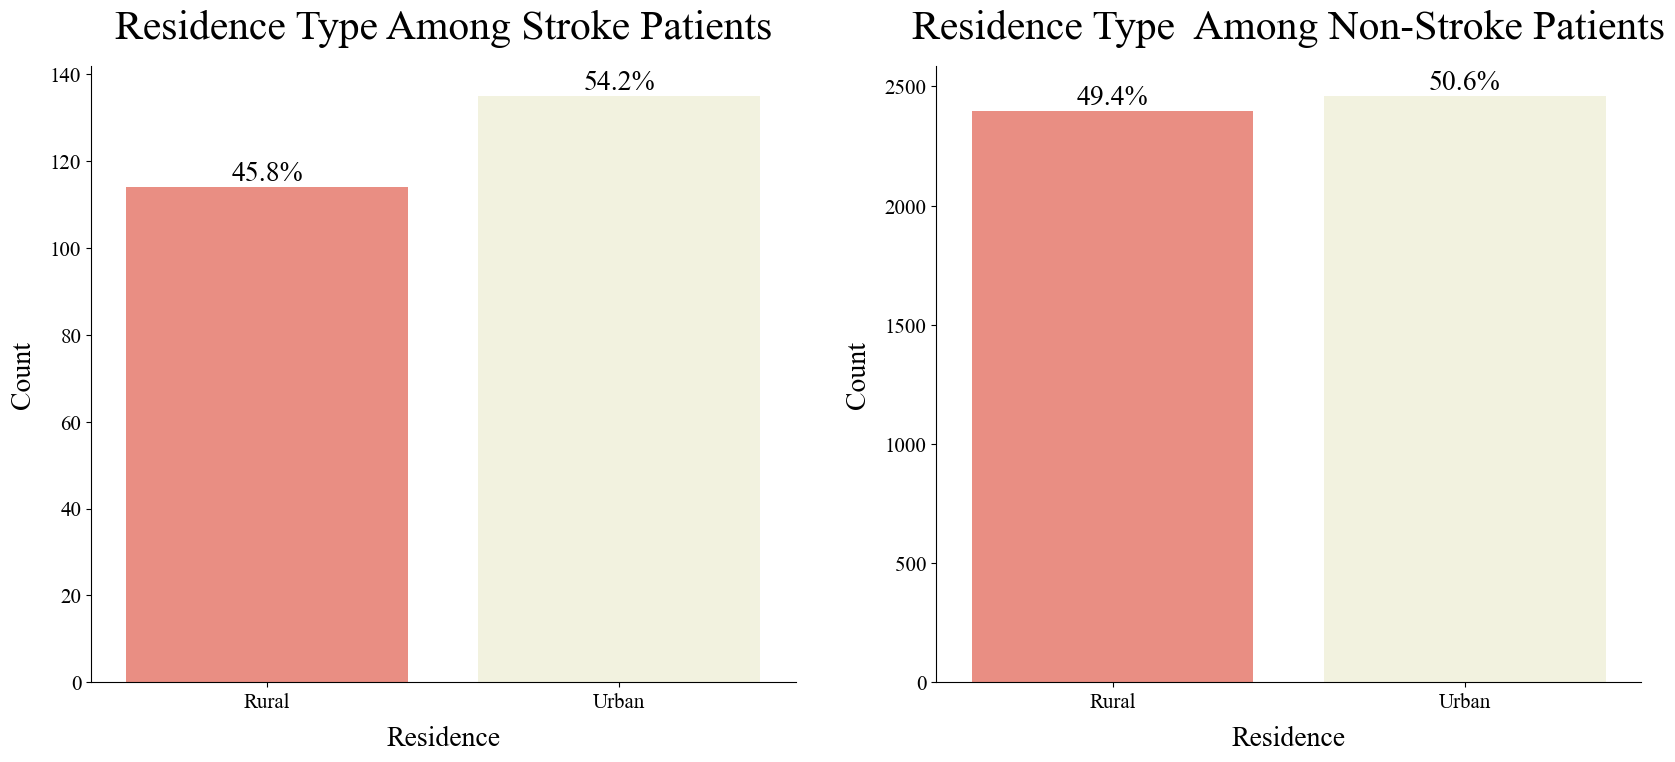

In [43]:
labels = ['Urban', 'Rural']
palette = [color_9, color_10]
y = 'Count'

data_1 = wi_stroke_residence
data_2 = no_stroke_residence
title_1 = 'Residence Type Among Stroke Patients'
title_2 = 'Residence Type  Among Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette)

### **Section Summary**
> * It seems that the place of residence (Urban or Rural) is not a significant factor.
> * The percentages in each catogory are the same.

## **Smoking Habits**

In [44]:
feature = 'Smoking'
target = 'Stroke'
data = data.copy()

In [45]:
wi_stroke_smoking = create_distributions(data, feature, target, value = 1)

In [46]:
no_stroke_smoking = create_distributions(data, feature, target, value = 0)

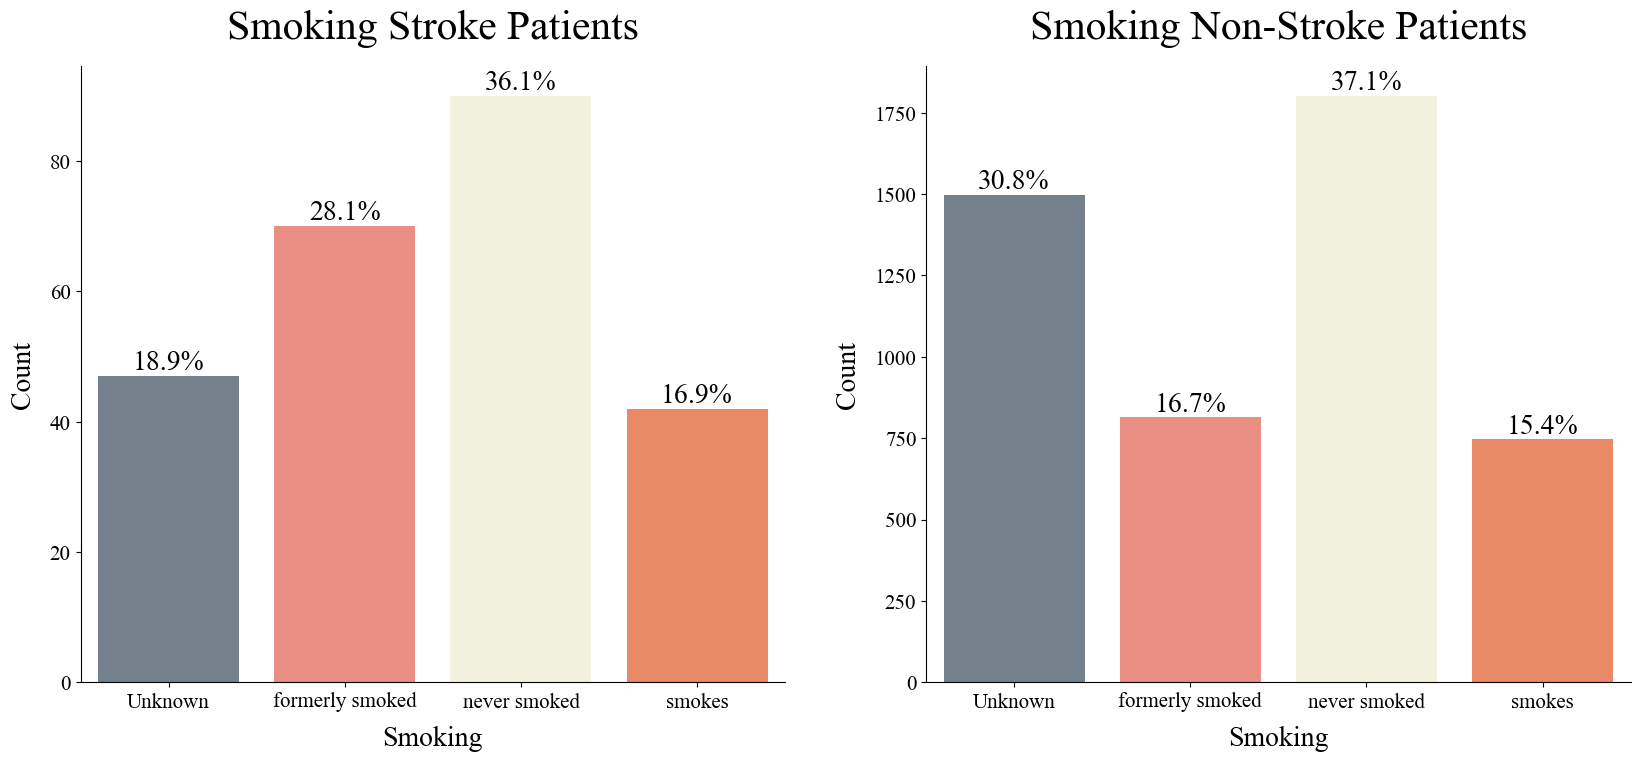

In [47]:
labels = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']   
palette = [color_8, color_9, color_10, color_11]
y = 'Count'
data_1 = wi_stroke_smoking
data_2 = no_stroke_smoking
title_1 = 'Smoking Stroke Patients'
title_2 = 'Smoking Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, feature, y, palette)

### **Section Summary**
> * These figures seem interesting. 
> * Although a higher percentage of those who formerly smoked are in the stroke category, the percentage of current smokers are about the same in both groups. 
> * I did not expect that. I was sure that smoking will be a significant risk factor. 
> * Again, there is not sufficient data here to make any type of conclusion regarding the relationship of smoking and stroke. However, I was surprised to see that smoking doesn't seem to be a certain factor, at least according to this data.

## **Glucose Bins**

In [14]:
feature = 'AVG Glucose'
target = 'Stroke'
new_feature = 'Glucose Bins'

bins = [50, 100, 150, 200, 250, 300]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

In [15]:
df = data.copy()
data = create_bins(df, feature, new_feature, bins, labels)
data[new_feature] = data[new_feature].astype('object')

In [50]:
df = data[data[target] == 1].copy()
wi_stroke_glucose = count_bins(df, new_feature)

In [51]:
df = data[data[target] == 0].copy()
no_stroke_glucose = count_bins(df, new_feature)

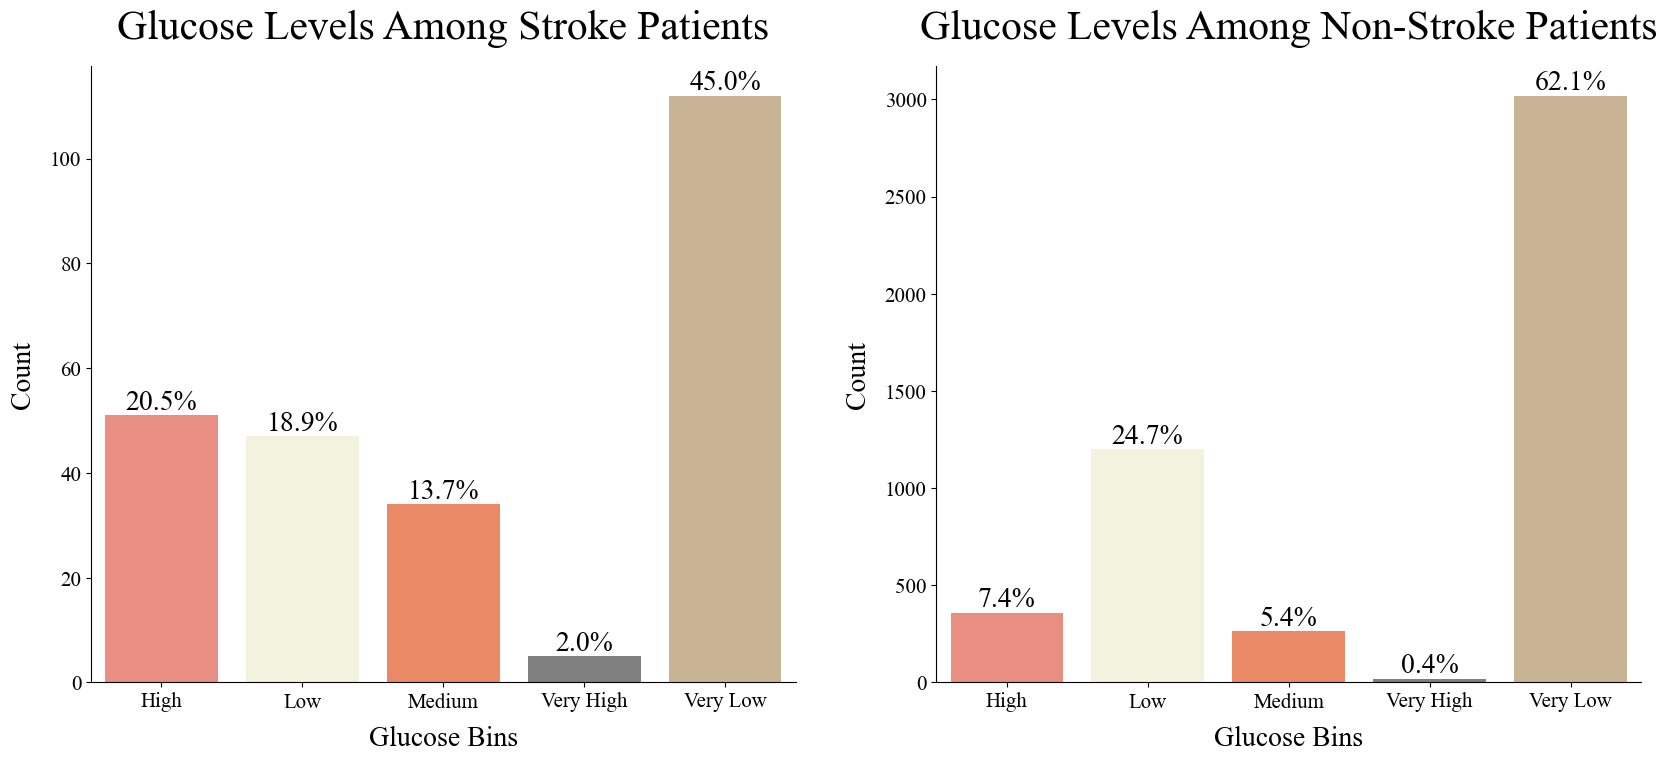

In [52]:
palette = [color_9, color_10, color_11, color_13, color_14]
y = 'Count'

data_1 = wi_stroke_glucose
data_2 = no_stroke_glucose
title_1 = 'Glucose Levels Among Stroke Patients'
title_2 = 'Glucose Levels Among Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, new_feature, y, palette)

### **Section Summary**
> * It seems that average glucose could be another risk factor contributing to stroke. 
> * **High (201 - 250):** The percentage of stroke patients with this range of average glucose is nearly 3 times than those who did not suffer a stroke.
> * **Medium (151 - 200)**: More than twice the percentage of stroke patients have this average glucose level.
> * **Low (101 - 150)**: More than twice the percentage of stroke patients have this average glucose level.
> * **Very Low (50 - 100)**: In this range, the average glucose levels of stroke and non-stroke patients do not seem to be very different. In fact, there is a slightly higher perectage of non-stroke patients at this glucose level.

# **BMI Bins**

In [16]:
feature = 'BMI'
new_feature = 'BMI Bins'
bins = [10, 20, 30, 40, 50, 70]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

In [17]:
df = data.copy()
data = create_bins(df, feature, new_feature, bins, labels)
data[new_feature] = data[new_feature].astype('object')

In [55]:
df = data[data[target] == 1]
wi_stroke_BMI = count_bins(df, new_feature)

In [56]:
df = data[data[target] == 0]
no_stroke_BMI = count_bins(df, new_feature)

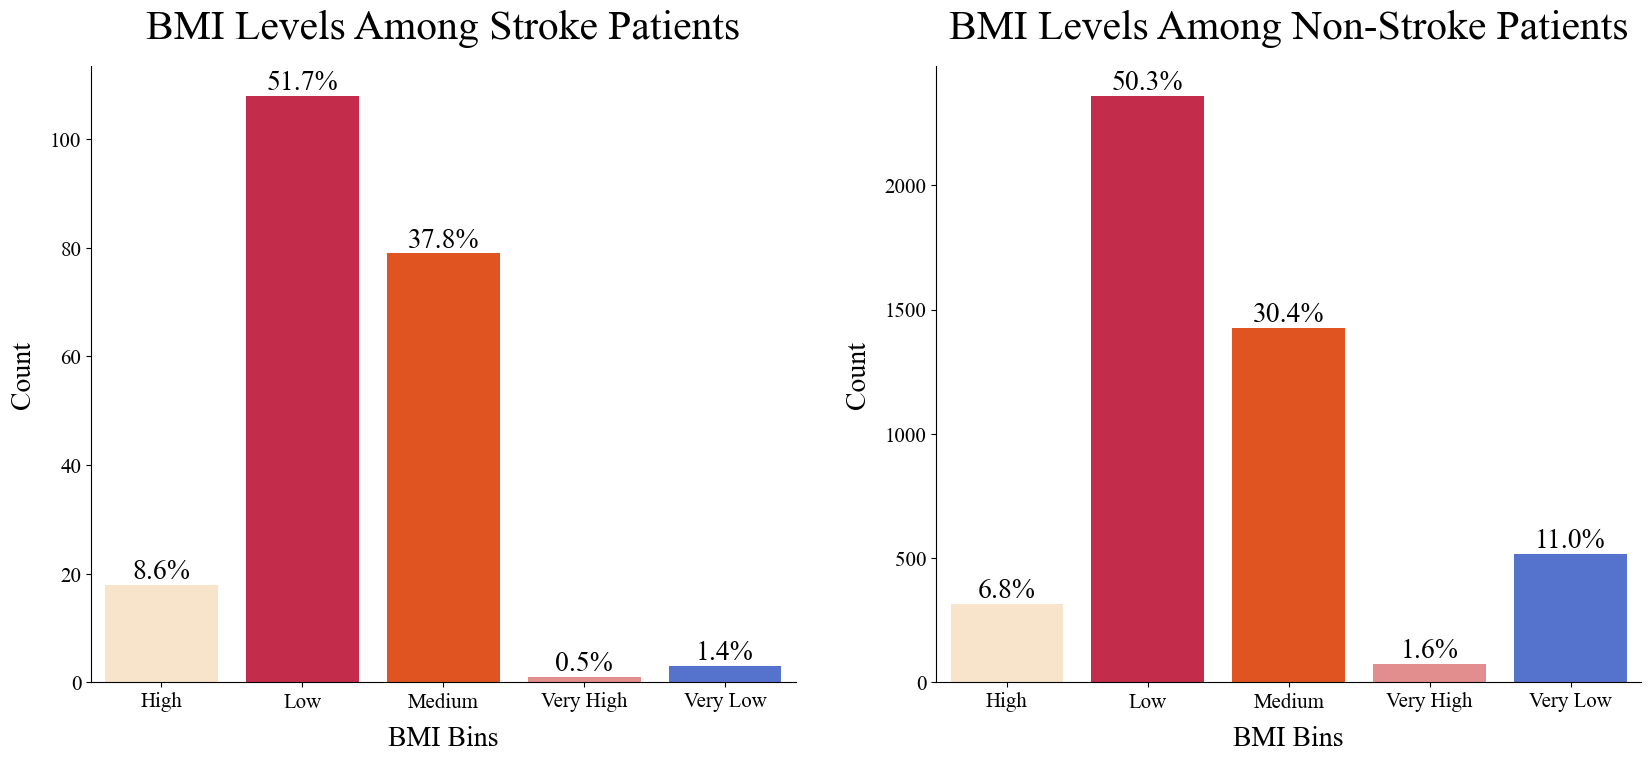

In [57]:
palette = [color_1, color_2, color_3, color_4, color_5,color_9, color_10, color_11, color_13, color_14]
y = 'Count'

data_1 = wi_stroke_BMI
data_2 = no_stroke_BMI
title_1 = 'BMI Levels Among Stroke Patients'
title_2 = 'BMI Levels Among Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, new_feature, y, palette)

### **Section Summary**
> * Except at the lowest BMI range of 11 - 20, stroke and non-stroke patients seem to be nearly identical in their BMI scores. 
> * Althugh I did not expect it, BMI does not seem to have a significant predictive value.

## **Age Bins**

In [18]:
feature = 'Age'
new_feature = 'Age Bins'
bins = [0, 30, 50, 70, 80, 90]
labels = ['0-30', '30-50', '50-70', '70-80', '80-90']

In [19]:
df = data.copy()
data = create_bins(df, feature, new_feature, bins, labels)
data[new_feature] = data[new_feature].astype('object')

In [60]:
df = data[data[target] == 1]
wi_stroke_age = count_bins(df, new_feature)

In [61]:
df = data[data[target] == 0]
no_stroke_age = count_bins(df, new_feature)

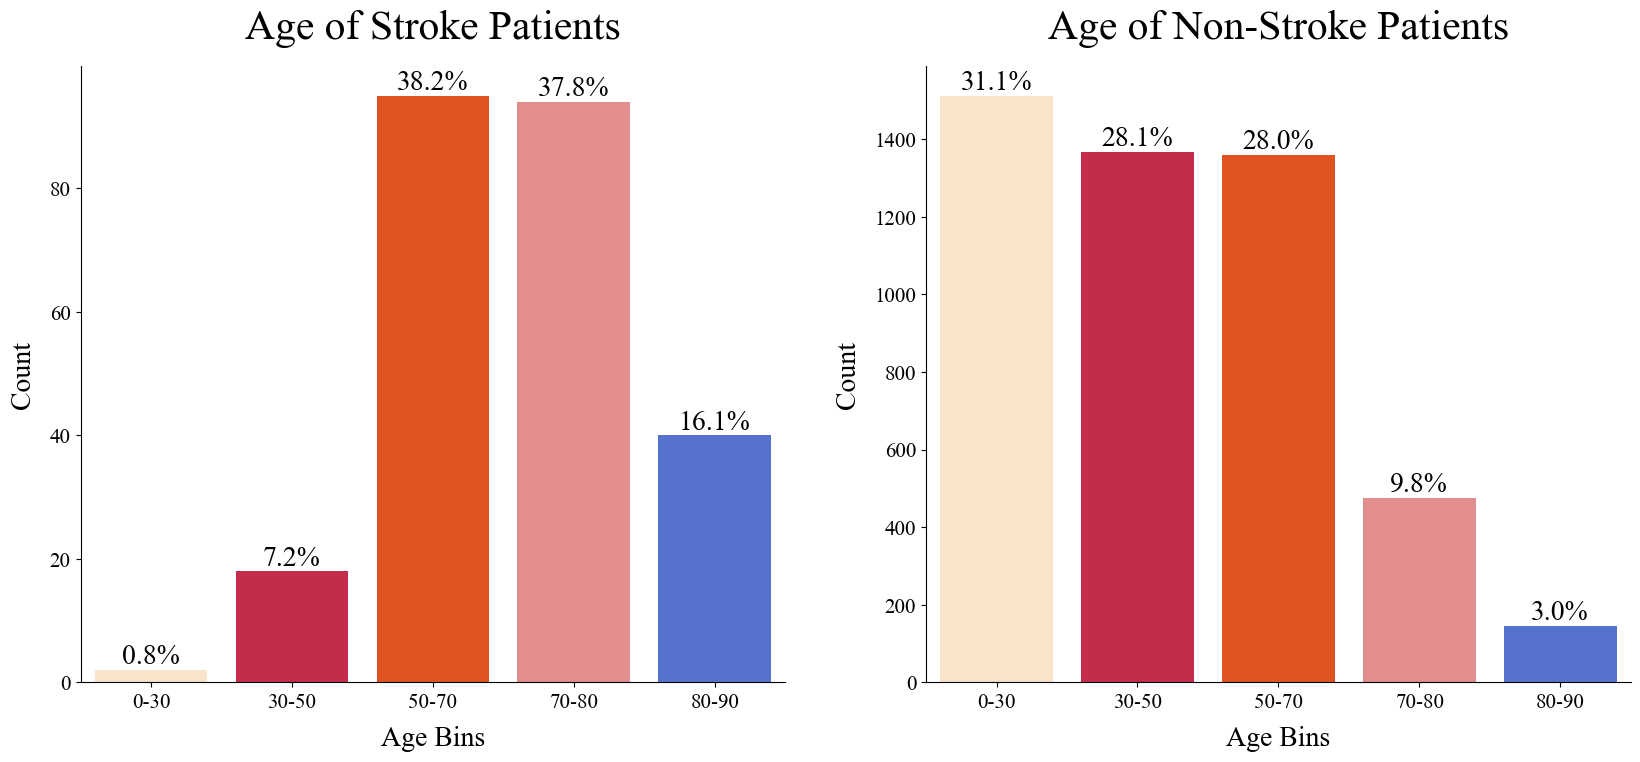

In [62]:
palette = [color_1, color_2, color_3, color_4, color_5,color_9, color_10, color_11, color_13, color_14]
y = 'Count'

data_1 = wi_stroke_age
data_2 = no_stroke_age
title_1 = 'Age of Stroke Patients'
title_2 = 'Age of Non-Stroke Patients'

side_by_side_barplot(data_1, data_2, title_1, title_2, labels, new_feature, y, palette)

### **Section Summary**
> * It is obvious that a higher percentage of younger people are in the non-stroke group. 
> * In the 60 - 70 range, the percentage of stroke sufferers is almost 4 times than that patients who did not suffer a stroke. 
> * This clearly shows age as a risk factor. 

# **Hypothesis Tests**

## **Hypothesis Test: Smoking Habits and Stroke** 

**Null**: There is no significant difference between the proporation of smokers who suffered a stroke and non-smokers.<BR>
**Alternative**: A higher proportion of smokers suffered a stroke compared to non-smokers. 

In [63]:
feature = 'Smoking'
target = 'Stroke'

In [64]:
smokers = data.loc[data[feature] == 'smokes']
count_smokers = smokers.shape[0]
count_smoker_stroke = (smokers[target] == 1).sum()
prop_smoker_stroke = count_smoker_stroke / count_smokers
print(
    f"Proportion of smokers who have suffered a stroke {prop_smoker_stroke:.3f}"
)

Proportion of smokers who have suffered a stroke 0.053


In [65]:
nonsmokers = data.loc[data[feature] == 'never smoked']
count_nonsmokers = nonsmokers.shape[0]
count_nonsmoker_stroke = (nonsmokers[target] == 1).sum()
prop_nonsmoker_stroke = count_nonsmoker_stroke / count_nonsmokers
print(
    f"Proportion of nonsmokers who have suffered a stroke {prop_nonsmoker_stroke:.3f}"
)

Proportion of nonsmokers who have suffered a stroke 0.048


### **Two-Proportion Z-Test**

In [66]:
numerator = np.array([count_smoker_stroke, count_nonsmoker_stroke])
denominator = np.array([count_smokers, count_nonsmokers])

stat, pval = proportions_ztest(numerator, denominator, alternative="two-sided")

print(f"The p-value is: {pval:.2f}")

if pval< 0.05:
    print("Null hypothesis is rejected.")
else:
    print("Failed to reject the null hypothesis.")

The p-value is: 0.54
Failed to reject the null hypothesis.


### **Section Summary**
> * Two-Proportion Z-test <BR>
    - Null Hypothesis (H0) indicates that the proportions of the two populations are not significantly different. <BR>
    - Alternative Hypothesis (H1) indicates that the proportions in the two populations are significantly different. <BR>
> * The p-value of 0.54 is above the significance level threshold of 0.05 in the Standards section of this project. This high p-value suggests that there is no significant evidence to reject the null hypothesis. In other words, any observed effect or difference is likely due to random chance rather than a true effect.
> * Based on this p-values, the null hypothesis is not rejected. 
> * This fits with our observations earlier when looking at percentage of smokers and non-smokers among patients who suffered a stroke and those who did not. 

## **Hypothesis Test: Mean Glucose Level and Stroke**

**Null**: There is no significant difference between the mean AVG Glucose of patients who suffered a stroke and patients who did not.<BR>
**Alternative**: The mean AVG Glucose of patients who suffered a stroke is significantly different than the mean AVG Glucose of patients who did not. 

In [67]:
feature = 'AVG Glucose'
target = 'Stroke'

In [68]:
no_stroke_glucose = data[data[target] == 0][feature]
wi_stroke_glucose = data[data[target] == 1][feature]

In [69]:
var_non_stroke_glucose = np.var(no_stroke_glucose)
var_stroke_glucose = np.var(wi_stroke_glucose)

if var_non_stroke_glucose == var_stroke_glucose:
    variance = True
else:
    variance = False

### **Two-Sample T-Test**

In [70]:
pvalue = two_sample_t_test(no_stroke_glucose,wi_stroke_glucose, variance)

The variance of the samples are different.
The p-value is:  0.00000000002373124054
Null hypothesis is rejected.


### **Section Summary**
> * The two-sample t-test is a statistical method used to determine if there is a significant difference between the means of two independent groups. This test assumes that the data from both groups are normally distributed.
> * This low p-value suggests that there may be significant evidence to reject the null hypothesis. In other words, any observed effect or difference is not likely due to random chance alone and may be a true effect.
> * This suggests that average glucose level could be a significant risk factor for stroke and it goes with our earlier observation of average glucose levels in patients who suffered a stroke and those who did not. 

# **Feature Engineering**

In this section, I create new features from existing ones in hopes of improving model performance.

In [39]:
data_engineered = data.copy()

### **Missing Indicator**

In [41]:
ami = AddMissingIndicator()
ami.fit(data_engineered)
data_engineered = ami.transform(data_engineered)
data_engineered.rename(columns={'BMI_na': 'BMI_NAN'}, inplace=True)
data_engineered.rename(columns={'BMI Bins_na': 'BMI Bins_NAN'}, inplace=True)

### **Sum Glucose / Age**

In [42]:
mf = MathFeatures(variables = ["AVG Glucose",'Age'], func = "sum")
mf.fit(data_engineered)
data_engineered= mf.transform(data_engineered)

### **Product Glucose / Age**

In [43]:
mf = MathFeatures(variables = ["AVG Glucose",'Age'], func = "prod")
mf.fit(data_engineered)
data_engineered= mf.transform(data_engineered)

### **Mean Glucose / Age**

In [44]:
mf = MathFeatures(variables = ["AVG Glucose",'Age'], func = "mean")
mf.fit(data_engineered)
data_engineered= mf.transform(data_engineered)

### **Hypertenstion OR Heart Disease**

In [45]:
data_engineered['Hypertension or Heart_Disease'] = data_engineered['Hypertension'] | data_engineered['Heart Disease']

### **Hypertenstion AND Heart Disease**

In [47]:
data_engineered['Hypertension and Heart_Disease'] = data_engineered['Hypertension'] & data_engineered['Heart Disease']

### **Label Encoder**

In [48]:
label_encoder = LabelEncoder()
obj = data_engineered.dtypes == "object"

for col in list(obj[obj].index):
    data_engineered[col] = label_encoder.fit_transform(data_engineered[col])

### **Correlation between each Feature and the Target Feature**

In [49]:
corr_matrix = data_engineered.corr(numeric_only=True)
corr_matrix['Stroke'].sort_values(ascending=False)

Stroke                            1.000000
prod_AVG Glucose_Age              0.246548
Age                               0.245239
sum_AVG Glucose_Age               0.208640
mean_AVG Glucose_Age              0.208640
Hypertension or Heart_Disease     0.171856
BMI_NAN                           0.141231
Heart Disease                     0.134905
AVG Glucose                       0.131991
Hypertension                      0.127891
Ever Married                      0.108299
Hypertension and Heart_Disease    0.080759
BMI                               0.042341
Smoking                           0.028108
Residence                         0.015415
Gender                            0.009081
Work                             -0.032323
Name: Stroke, dtype: float64

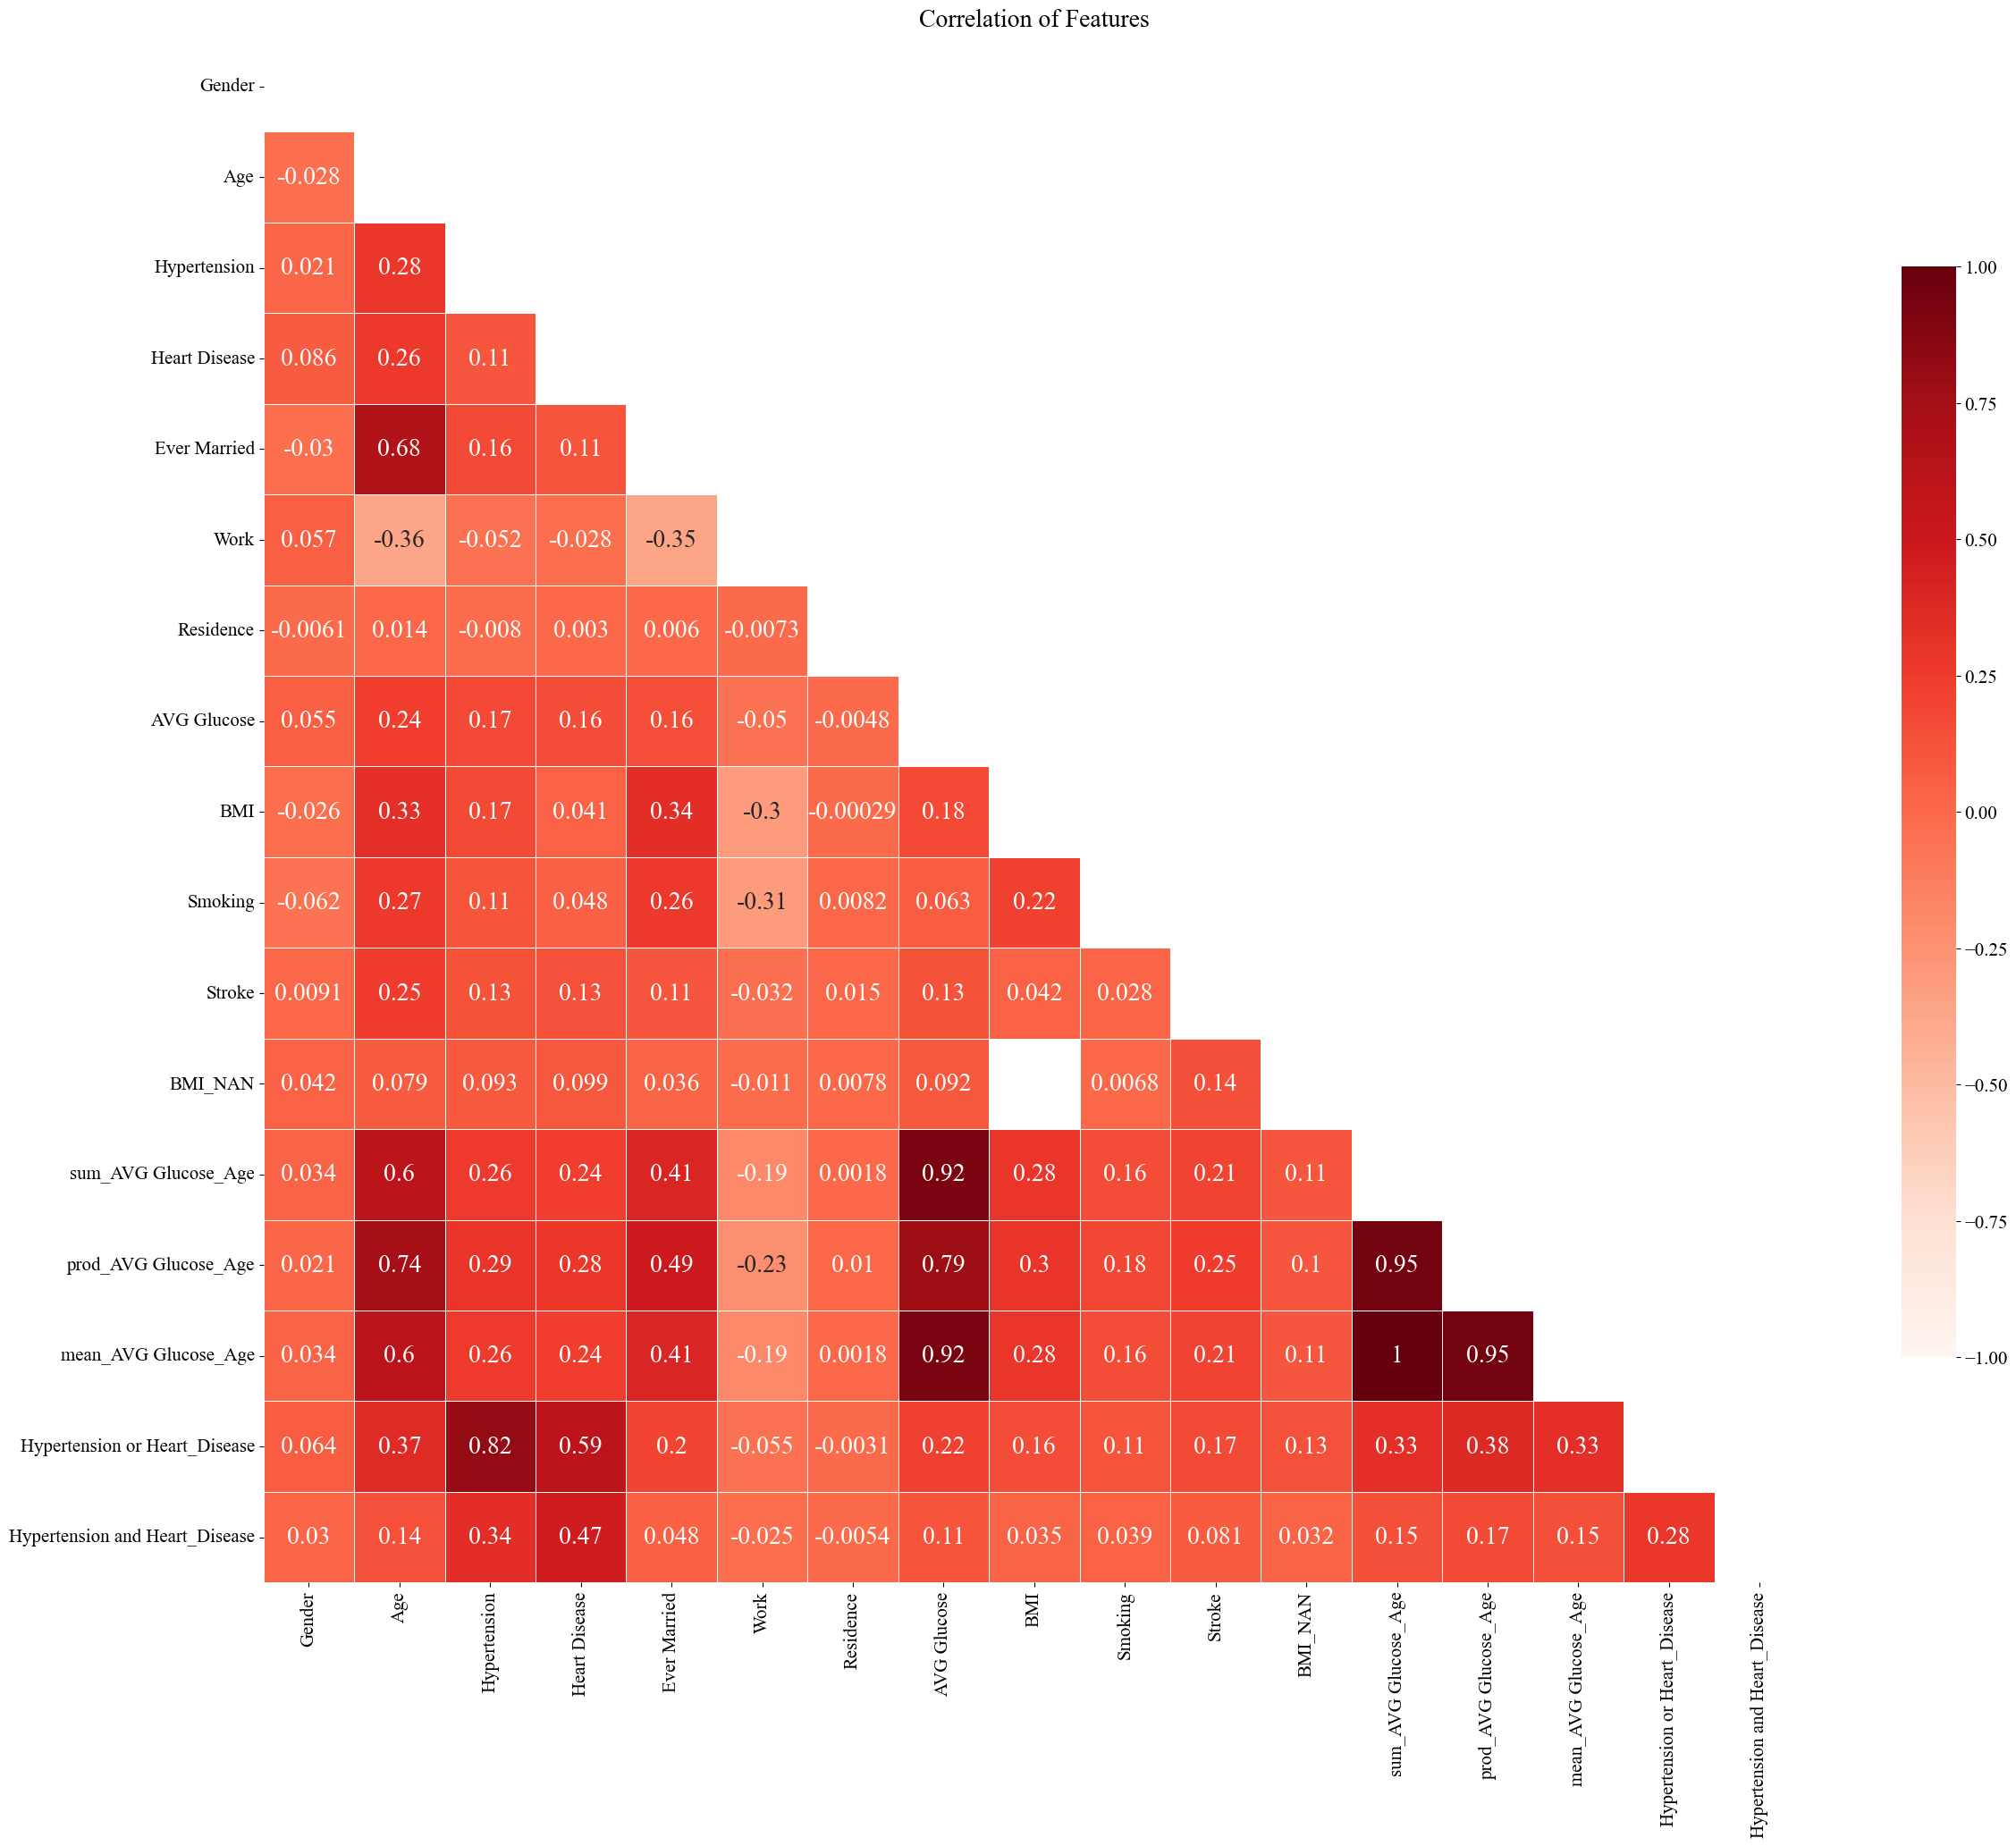

In [50]:
title = "Correlation of Features"
create_heatmap(data_engineered, title)

### **Drop Collinear Features**

In [51]:
dcf = DropCorrelatedFeatures(threshold=0.7)
data_engineered = dcf.fit_transform(data_engineered)

In [52]:
corr_matrix = data_engineered.corr(numeric_only=True)
corr_matrix['Stroke'].sort_values(ascending=False)

Stroke                            1.000000
Age                               0.245239
BMI_NAN                           0.141231
Heart Disease                     0.134905
AVG Glucose                       0.131991
Hypertension                      0.127891
Ever Married                      0.108299
Hypertension and Heart_Disease    0.080759
BMI                               0.042341
Smoking                           0.028108
Residence                         0.015415
Gender                            0.009081
Work                             -0.032323
Name: Stroke, dtype: float64

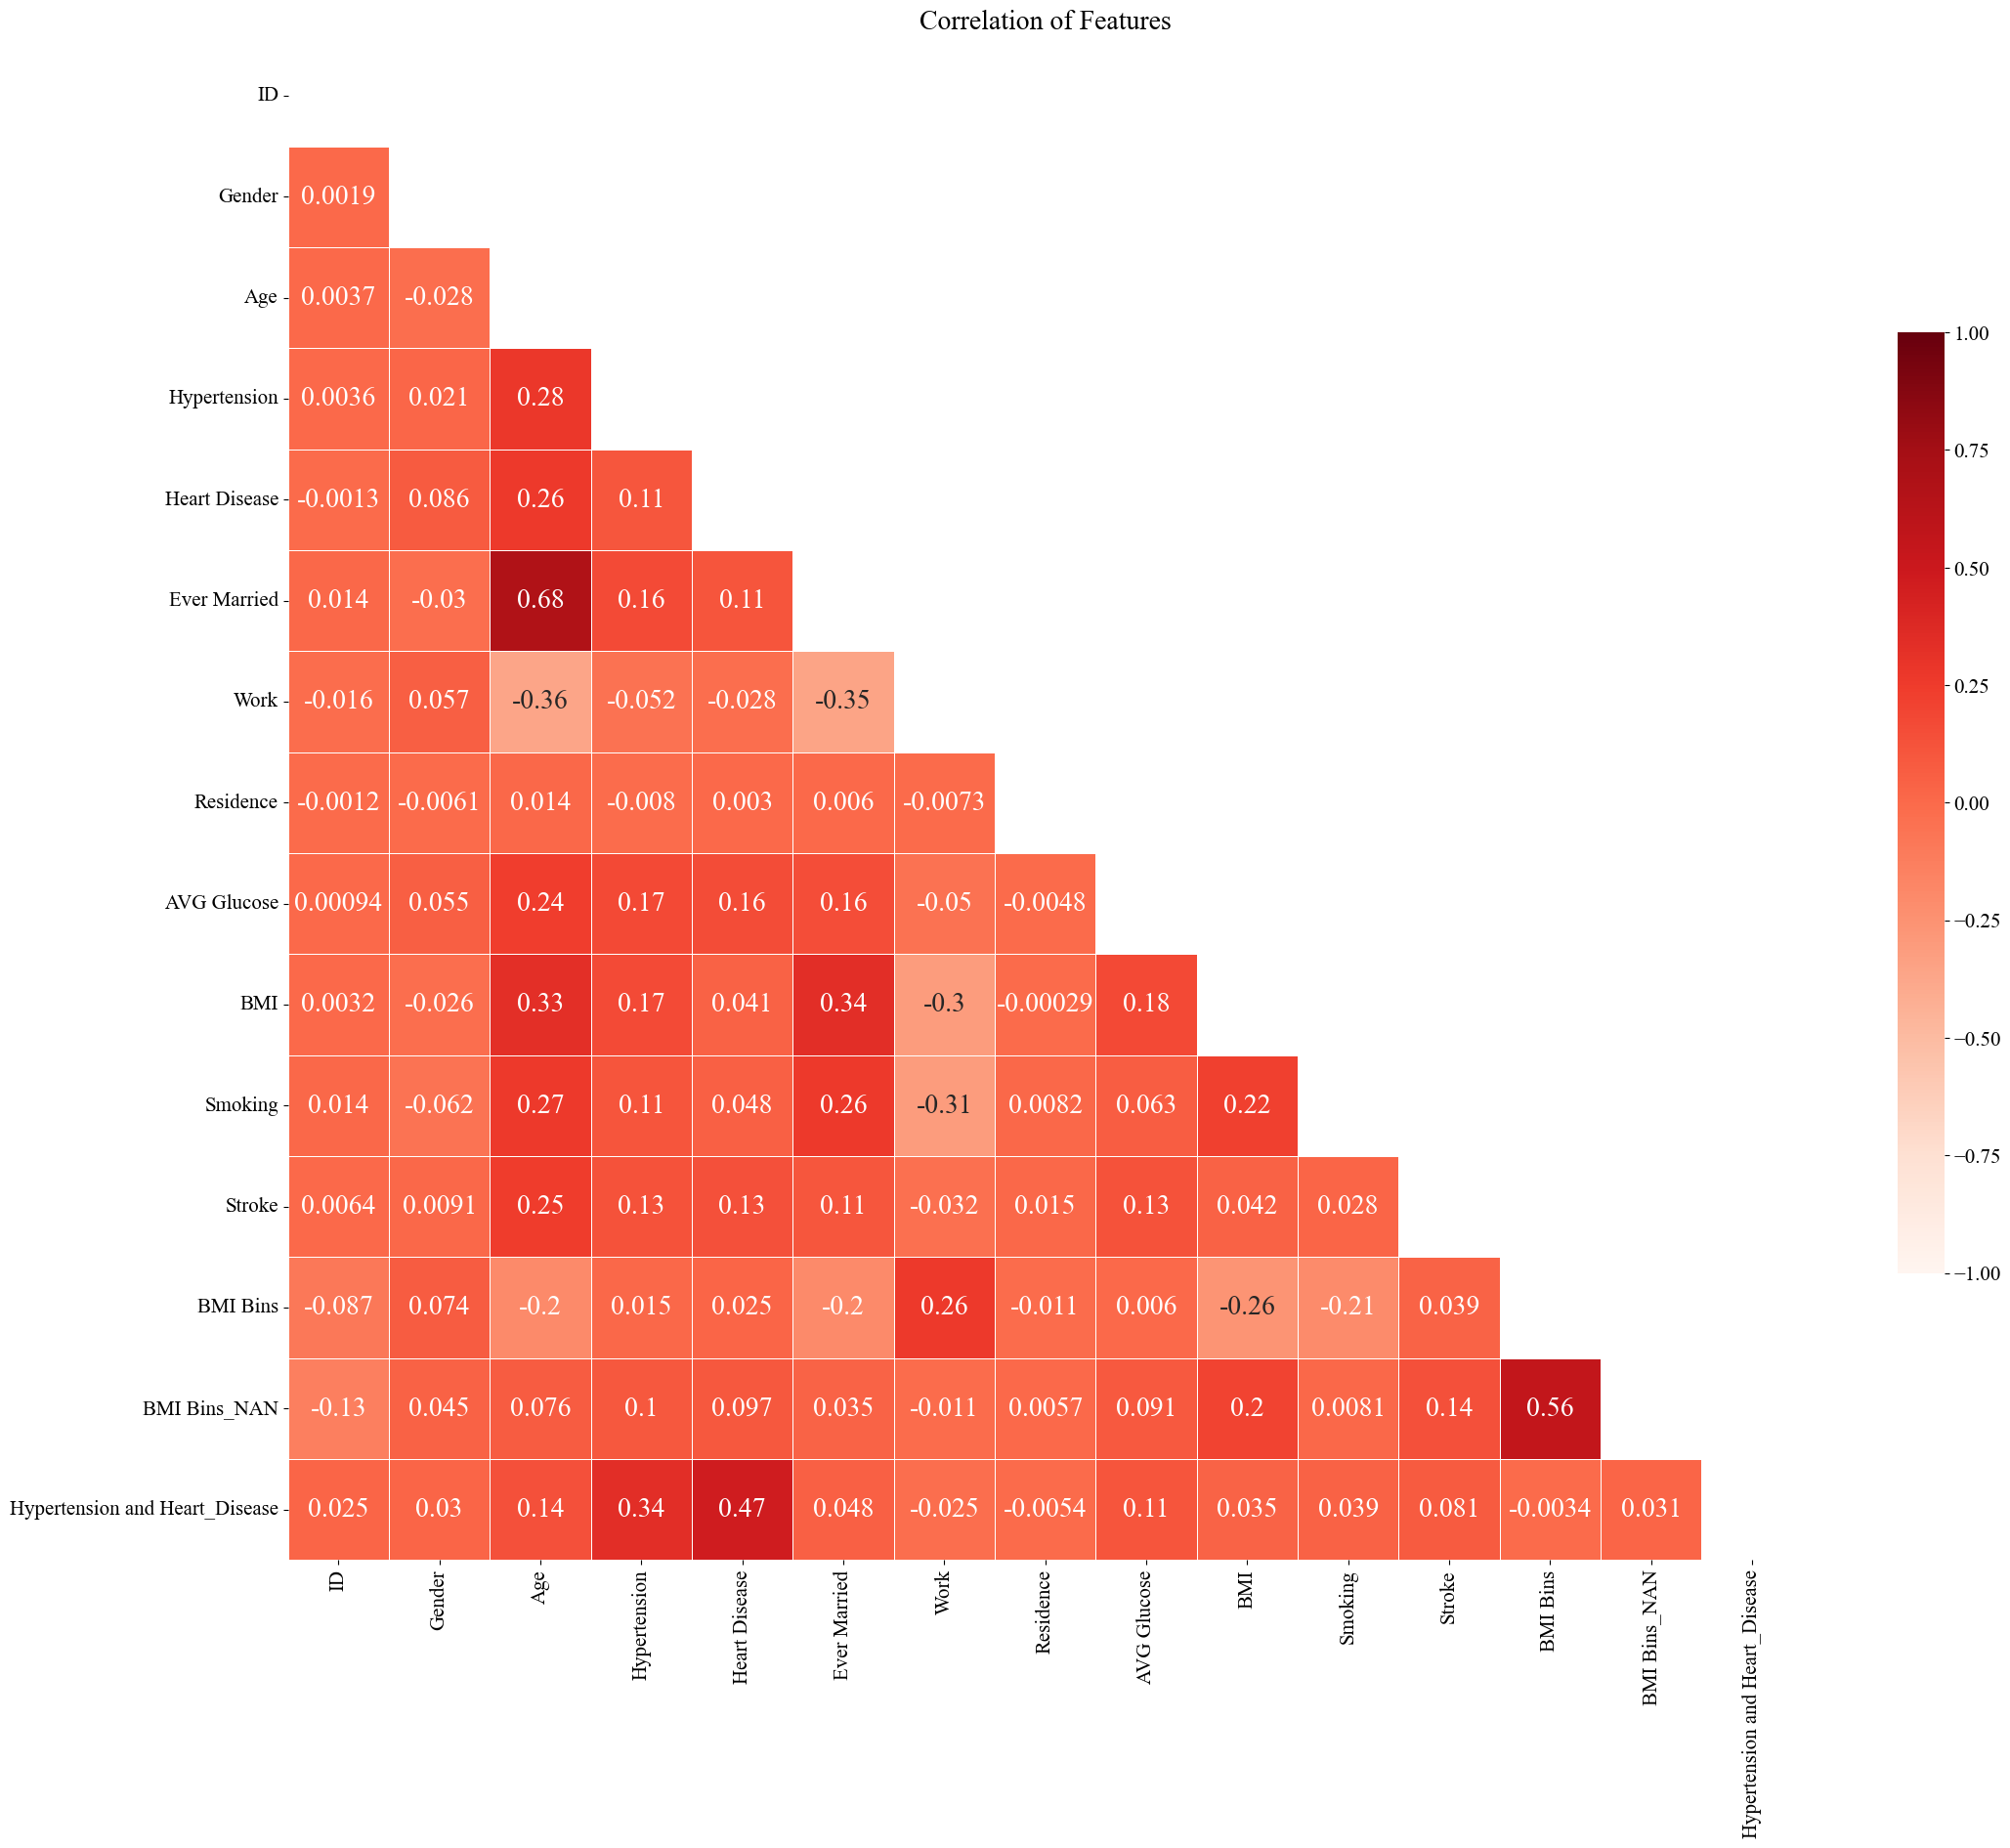

In [82]:
title = "Correlation of Features"
create_heatmap(data_engineered, title)

### **Section Summary**
> * In this section, I dealth with missing values in the BMI and BMI related columns.
> * I created 5 additional features based on the existing features realted to risk factors identified in the previous section: Heart Disease, Hypertension, Age, Average Glucose.
> * Using Feature Engine library, I dropped collinear features.
> * The mutual information column clearly identifies age as the major predictor of stroke, followed by Heart Disease.

# **Machine Learning**

In [175]:
random_seed = 101
target = 'Stroke'

### **Eliminate White Space in Column Names**

In [176]:
data_engineered.columns = [col.replace(' ', '_') for col in data_engineered.columns]

### **Train Test Split**

In [177]:
X = data_engineered.drop(columns=[target])
y = data_engineered[target]

X, y = shuffle(X, y, random_state=random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)

### **K-Fold Cross Validation**

In [178]:
columns_to_impute = ['BMI']
columns_to_scale = ['Age', 'AVG_Glucose', 'BMI']
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

X[columns_to_impute] = X[columns_to_impute].fillna(X[columns_to_impute].median())

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), columns_to_scale)  

    ],
    remainder='passthrough' 
)

svc_model = SVC(class_weight='balanced')
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', svc_model)
])


lg_model = LogisticRegression(class_weight='balanced')
lg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lg', lg_model)
])


xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb_model)
])


lgbm_model = LGBMClassifier(class_weight='balanced', verbose=0)
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', lgbm_model)
])


rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=random_seed)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf_model)
])


gb_model = GradientBoostingClassifier(n_estimators=100, random_state=random_seed)
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', gb_model)
])


pipelines = {
    "SVC": svc_pipeline,
    "Logistic Regression": lg_pipeline,
    "XGBoost": xgb_pipeline,
    "LightGBM": lgbm_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline
}

scorer = make_scorer(recall_score, pos_label=1)

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10, scoring=scorer)
    print(f"{name} -- Mean Recall:  {scores.mean():.2f}")

SVC -- Mean Recall:  0.26
Logistic Regression -- Mean Recall:  0.82
XGBoost -- Mean Recall:  0.20
LightGBM -- Mean Recall:  0.33
Random Forest -- Mean Recall:  0.04
Gradient Boosting -- Mean Recall:  0.05


### **Section Summary**
> * In this section, I used cross valildation to test 5 different models on the engineered dataset.
> * Logistic Regression surpassed the other models with a recall score of 82%, also surpasoing my standard accuracy score of 75%. 
> * The other models performed poorly.

## **Patients Over Age 50**

In this section, I eliminated the sample population below the age 50, following the information obtained in the previous section regarding the correlation between age and stroke. 

In [171]:
data_overfifty = data_engineered[data_engineered['Age'] > 50]

### **Train Test Split**

In [172]:
X = data_overfifty.drop(columns=[target])
y = data_overfifty[target]

X, y = shuffle(X, y, random_state=random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)

### **K-Fold Cross Validation**

In [174]:
columns_to_impute = ['BMI']
columns_to_scale = ['Age', 'AVG_Glucose', 'BMI']
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

X[columns_to_impute] = X[columns_to_impute].fillna(X[columns_to_impute].median())

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), columns_to_scale)  

    ],
    remainder='passthrough' 
)

svc_model = SVC(class_weight='balanced')
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', svc_model)
])


lg_model = LogisticRegression(class_weight='balanced')
lg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lg', lg_model)
])


xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb_model)
])


lgbm_model = LGBMClassifier(class_weight='balanced', verbose=0)
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', lgbm_model)
])


rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=random_seed)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf_model)
])


gb_model = GradientBoostingClassifier(n_estimators=100, random_state=random_seed)
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', gb_model)
])


pipelines = {
    "SVC": svc_pipeline,
    "Logistic Regression": lg_pipeline,
    "XGBoost": xgb_pipeline,
    "LightGBM": lgbm_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline
}

scorer = make_scorer(recall_score, pos_label=1)

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10, scoring=scorer)
    print(f"{name} -- Mean Recall:  {scores.mean():.2f}")

SVC -- Mean Recall:  0.46
Logistic Regression -- Mean Recall:  0.67
XGBoost -- Mean Recall:  0.15
LightGBM -- Mean Recall:  0.20
Random Forest -- Mean Recall:  0.04
Gradient Boosting -- Mean Recall:  0.08


### **Section Summary**
> * In this section, I used cross valildation to test 5 different models on the engineered dataset on a dataset limited to patient over 50, since the data showed that these patients are more likely to suffer a stroke.
> * None of the models surpassed the recall score of 75%.

# **Mutual Information Classification**

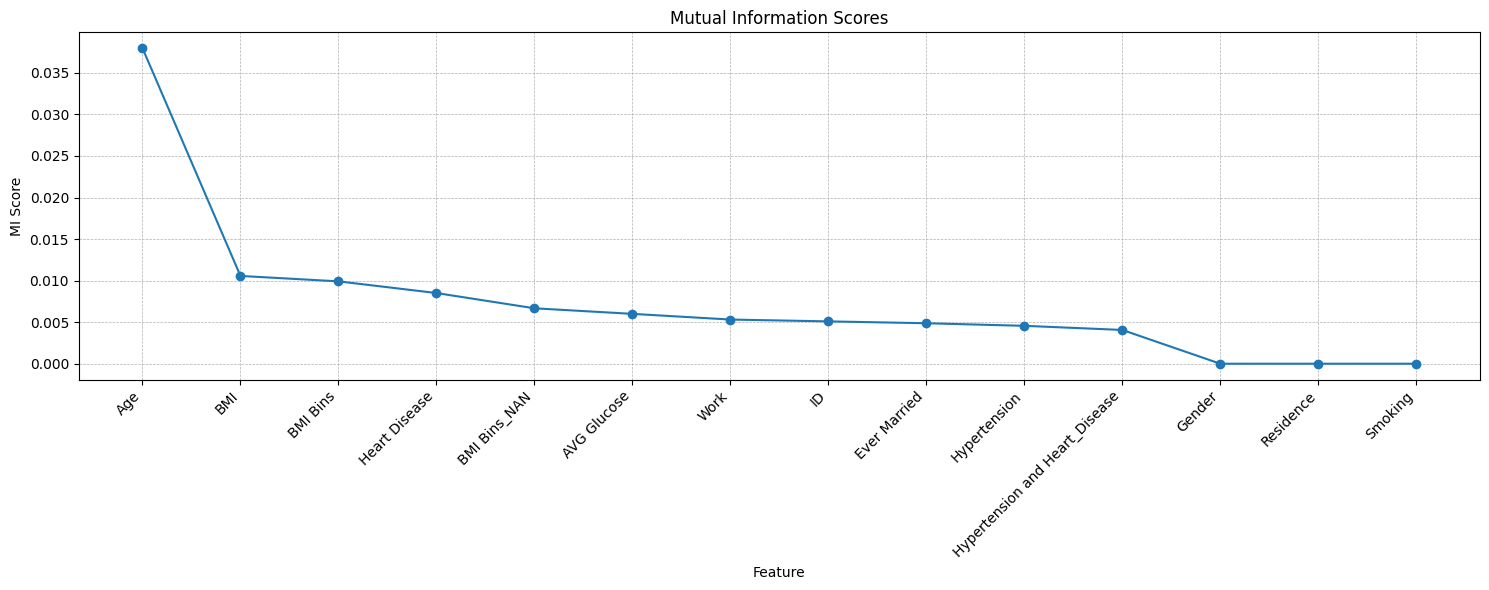

In [32]:
random_seed = 101
target = 'Stroke'

features = data_engineered.drop(columns=[target])
target = data_engineered[target]

features['BMI'] = features['BMI'].fillna(features['BMI'].median())

mi_scores = mutual_info_classif(features, target, random_state=random_seed)
create_plot_mi_scores(features, mi_scores)

## **Age, BMI, Heart Disease, AVG Glucose, Hypertension, Work, Ever Married**

In this section, in my machine learning models, I eliminated all features, except the 4 features identified as possible risk factors in the previous section.

In [60]:
columns_to_keep = ['Age', 'BMI', 'Heart Disease', 'AVG Glucose', 'Hypertension', 'Work', 'Ever Married', 'Stroke']
data_age_HD_HY_GL = data_engineered[columns_to_keep]

### **Train Test Split**

In [61]:
X = data_age_HD_HY_GL.drop(columns=[target])
y = data_age_HD_HY_GL [target]

X, y = shuffle(X, y, random_state=random_seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_seed)

### **K-Fold Cross Validation**

In [64]:
columns_to_impute = ['BMI']
columns_to_scale = ['Age', 'AVG Glucose', 'BMI']
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

X[columns_to_impute] = X[columns_to_impute].fillna(X[columns_to_impute].median())


preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), columns_to_scale)  

    ],
    remainder='passthrough' 
)

svc_model = SVC(class_weight='balanced')
svc_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', svc_model)
])


lg_model = LogisticRegression(class_weight='balanced')
lg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lg', lg_model)
])


xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight)
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('xgb', xgb_model)
])


lgbm_model = LGBMClassifier(class_weight='balanced', verbose=0)
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lgbm', lgbm_model)
])


rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=random_seed)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf_model)
])


gb_model = GradientBoostingClassifier(n_estimators=100, random_state=random_seed)
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gb', gb_model)
])


pipelines = {
    "SVC": svc_pipeline,
    "Logistic Regression": lg_pipeline,
    "XGBoost": xgb_pipeline,
    "LightGBM": lgbm_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline
}

scorer = make_scorer(recall_score, pos_label=1)

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10, scoring=scorer)
    print(f"{name} -- Mean Recall:  {scores.mean():.2f}")

SVC -- Mean Recall:  0.78
Logistic Regression -- Mean Recall:  0.79
XGBoost -- Mean Recall:  0.20
LightGBM -- Mean Recall:  0.41
Random Forest -- Mean Recall:  0.02
Gradient Boosting -- Mean Recall:  0.01


### **Section Summary**
> * In this section, I used cross valildation to test 5 different models on the engineered dataset on a limited data set of 4 features only, the 4 features that showed the most predictive power of all the other ones.
> * Logistic Regression and SVC  performed well. Both logistic regression and SVC surpassed the other models with a reacll score of 79% and 82% respectively.

### **Tuned SVC Hyperparameters**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
import shap

columns_to_impute = ['BMI']

X[columns_to_impute] = X[columns_to_impute].fillna(X[columns_to_impute].median())

model = svc_model

def run_shap_explainer(model, X):
    # Fit the model (if not already fitted)
    if not model.named_steps['svc'].probability:
        model.named_steps['svc'].probability = True
        model.named_steps['svc'].fit(X, y_train)

    # Create SHAP explainer
    explainer = shap.Explainer()

    # Calculate SHAP values
    shap_values = explainer(X)

    # Plot SHAP summary plot
    shap.summary_plot(shap_values, X)

# Assuming X is your input data for which you want to explain predictions
run_shap_explainer(model, X)


In [184]:
columns_to_scale = ['Age', 'AVG_Glucose']

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', RobustScaler(), columns_to_scale)
    ],
    remainder='passthrough' 
)

svc_model_optimized = SVC(kernel='linear', gamma='auto', C=0.1, class_weight='balanced')
svc_pipeline_optimized = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svc', svc_model)
])


pipelines = {
    "SVC": svc_pipeline_optimized,
}

scorer = make_scorer(recall_score, pos_label=1)

for name, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=10, scoring=scorer)
    print(f"{name}: Mean Recall:  {scores.mean():.2f}")

SVC: Mean Recall:  0.82


### **SVC Pipeline Optimized**

In [179]:
svc_pipeline_optimized.fit(X, y)

recall_scorer = make_scorer(recall_score)
cv_results = cross_validate(svc_pipeline_optimized, X, y, cv=5, scoring={'recall': recall_scorer})

print("Recall scores for each fold:", cv_results['test_recall'])
print("Mean recall score:", cv_results['test_recall'].mean())

Recall scores for each fold: [0.88       0.88       0.9        0.76       0.87755102]
Mean recall score: 0.8595102040816327


### **Classification Report**

In [180]:
y_pred = svc_pipeline_optimized.predict(X_test)
recall = recall_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.65      0.79       977
           1       0.10      0.84      0.18        45

    accuracy                           0.66      1022
   macro avg       0.54      0.75      0.48      1022
weighted avg       0.95      0.66      0.76      1022



### **Confusion Matrix**

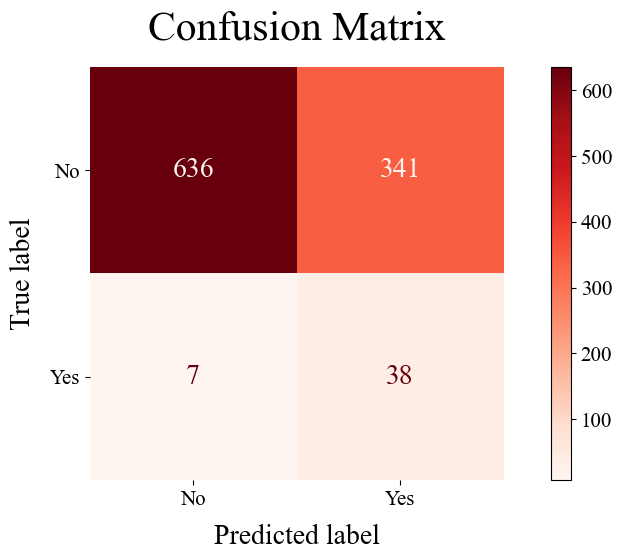

In [181]:
conf_matrix = ConfusionMatrixDisplay.from_estimator (svc_pipeline_optimized, X_test, y_test, cmap=plt.cm.Reds)

conf_matrix.ax_.set_xticks([0, 1])
conf_matrix.ax_.set_xticklabels(["No", "Yes"])
conf_matrix.ax_.set_yticks([0, 1])
conf_matrix.ax_.set_yticklabels(["No", "Yes"])

plt.title('Confusion Matrix')
plt.show()

### **Section Summary**
> * In this section, I used cross valildation to test 5 different models on the engineered dataset with ONLY ONE FEATURE: Age.
> * This was the best performing model. Logistic Regression, SVC and CAT Boost all surpassed the other models with a accuracy scores of 80%, 86% and 82% respectively, also surpasoing my standard accuracy score of 75%.
> * Using randomized Grid Search, I tried to fine tune the hyperparameters of the SVC model to obtain even a better performance. The results I obtained were the same, 86%.

# **Pickle File for Stremlit Deployment**

In [ ]:
with open('svc_pipeline_optimized.pkl', 'wb') as file:
    pickle.dump(svc_pipeline_optimized, file)

# **Conclusions**

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed over 5,000 datapoint related to patients with stroke. <br> 
>* **The Goal of the Project:** The goal of this project was to find a model that could predict if a patient is likely to suffer a stroke with a recall score of 75% or higher.<br>
>* **Models:** I utilized numerous models and numerous ways of feature engineering, data selection and hyperparameter tuning.  I chose Logistic Regressin and Support Vector Machines. I also chose three boosting classifiers, CAT, LGBM and XGB.<br>
>* **Encoding:** For categorical data, I tried both Label Encoding and One-Hot Encoding. I did not see significant differences. I chose Label Encoding since the resulting table was more readable.  <br>
>* **Imputing Missing Data:** For imputing missing data, I tried mean, median, zero and random imputers. I saw no signinficant difference in the predictions of my models. I chose Random Imputer, since it with such insufficient information about the participants, it made no sense to make any judgments about their features.  <br>
>* **Feature Engineering and Hyperparameter Testing:** I tried feature engineering and hyperparameter testing with techniques such as Backward Elimination, SHAP and OPTUNA. Some, I included in this report and some I didn't for sake of brevity. None of the measures I utilized improved resutls significanlty.<br> 
>* **Support Vector Machines:** SVC was able to get better or similar results than any other model, including the boosting models.<br>  
>* **Boosting Models:** Of the boosting models that I utilized, none of them performed better than SVC, although when I used Age as the only feature, all models performed well and about the same. 
>* **Age:** In the end, the only feature that could predict a stroke with the best recall score was Age. No other combination of features, including features that I created from other features, was a better predictor than age. This shows the real short comings of the data itself that I will mention in the Suggestions for Improvment section.
>* **Recommendation:** I am not able to make any medical recommendations based on this data. However, some obvious elements that I was sure would be risk factors of stroke such as smoking or BMI, turned out to be very poor predictors. <br> 

# **Suggestions for Improvement**

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **Domain Knowledge:** It is best if the data scientist has adequate domain knowledge on the topic of the analysis. I do not have any expertise in the medical field. There may be parts of the data that I have overlooked that may have been important and I may have given importance to parts that may have had little significance. <br>
>* **More Detailed Data:** The information in this dataset is not adequate to predict a disease as complex as stroke. Information such as family history, genetic markers, blood trace elements and more are missing. More detailed information could have helped make better predictions. <br>  
>* **Balance:** The data is heavily imbalanced. Of the more than 5,000 datapoints, only about 250 are stroke patients. This, in addition to inadequcy of the data as mentioned above adds to the poor prediction capabilities.  <br>  
>* **Visualizations:** If I had more time, I would improve on the bar graphs to emphasize certain data by using specific colors.  <br>  
>* **Functions:** I modularized most of the code in this notebook but not all due to limitation of time.  <br>  
>* **Statistics:** Continue to improve my statistical knowledge to create better analyses. <br>
>* **Pandas:** Continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** Continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** Continue to write better and more efficient Python code. <br>
>* **Clean Code:** Continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** Continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>
>* **Functions File:** For my next project, I will create a file with my functions, separate from the notebook file, to keep the notebook as a more reasonable length.<br>

# **Appendix**

## **Model Development Techniques**

>* **Batch Inference:** In batch inference, predictions are made on a large set of data at scheduled intervals.
>* **Real-Time Inference:** In online inference, predictions are made in real-time as requests arrive.
>* **Hybrid Interface:** Combines batch and online inference to leverage the benefits of both batch and real-time Interface.
>* **Shadow Mode Deployment:** A new model runs in parallel with the existing model but does not affect production outcomes. The results are logged for comparison.
>* **Canary Deployment:** A small subset of users is exposed to the new model, while the majority continues to use the old model. Based on performance, the new model is gradually rolled out to all users.
>* **A/B Testing:** Two or more models are deployed simultaneously to different user segments to evaluate which model performs better.
>* **Blue-Green Deployment:** TTwo identical environments (blue and green) are maintained. The new model is deployed to the blue environment while the green remains live. After validation, traffic is switched to the blue environment.
>* **Multi-Armed Bandit:** An extension of A/B testing that dynamically allocates traffic to the best-performing model based on ongoing results.

## **Boosting Models Used in this Report**

>* **CatBoost (Categorical Boost):** CatBoost (Categorical Boosting) is a gradient boosting algorithm that is designed to handle categorical features. CatBoost automatically encodes categorical features, which eliminates the need for manual preprocessing such as one-hot encoding or label encoding. CatBoost can handle missing data internally.<br>
>* **XGBoost (Extreme Gradient Boosting):** XGBoost (Extreme Gradient Boosting) uses the gradient boosting framework, where weak learners are sequentially added to the model, each one correcting the errors of its predecessor. XGBoost includes regularization terms (L1 and L2) to prevent overfitting and improve model generalization. XGBoost can handle missing data internally.<br>
>* **LightGBM (Light Gradient Boosting Machine):** LightGBM (Light Gradient Boosting Machine) is a gradient boosting framework developed by Microsoft, ightGBM can directly handle categorical features without needing to pre-process them into numerical forms.